In [1]:
import pandas as pd
from pandas import DataFrame as df
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import wntr as wn
import networkx as nx
from collections import defaultdict


In [2]:
#toplevelpath = "/Users/kavyaub/Documents/mySubjects/ConEdison"
toplevelpath = "/Users/aya/Documents/code-pfs/gas-nx"

all_datadir = "/NYU_LeakData"

def ask_user_path(pathinput, datadirinput):
    ask_user_path_text = 'FilePath for Data is: ' + pathinput + datadirinput + ' OK? y / n '
    response = 'y'
    user_inputYN = input(ask_user_path_text)
    if user_inputYN.lower() not in response:
        new_input = 'PASTE FULL PATH TO YOUR DATA DIRECTORY HERE: '
        newpath = input(new_input)
        return newpath
    elif user_inputYN in response:
        response2 = pathinput + datadirinput
        return response2

datadirpath = ask_user_path(toplevelpath, all_datadir)
#get_file_datadirpath = ask_user_path(toplevelpath, all_datadir)



FilePath for Data is: /Users/aya/Documents/code-pfs/gas-nx/NYU_LeakData OK? y / n y


In [10]:
def get_file(name):
    anomaly = datadirpath+name
    nFile=pd.read_csv(anomaly)
    return nFile

In [11]:

anomalyFreeNode = toplevelpath + all_datadir + "/LeakData_ZeroDegrees/NYU Anamoly Data_ZeroDeg_Nodes.csv"
nodeArr=pd.read_csv(anomalyFreeNode)

anomalyFree = toplevelpath + all_datadir + "/LeakData_ZeroDegrees/NYU Anamoly Data_ZeroDeg_Nodes.csv"
nFile0=pd.read_csv(anomalyFree)

anomaly = toplevelpath + all_datadir + "/LeakData_ZeroDegrees/NYU Anamoly Data_ZeroDeg_Nodes_Leak1.csv"
nFile1=pd.read_csv(anomaly)



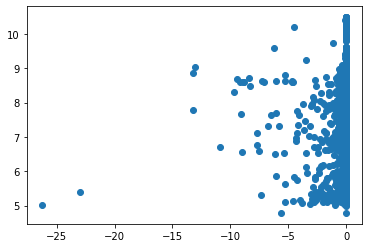

In [12]:
#for col in nFile1.columns:
#    print(col)
#NodeResultFlow
#NodePressure
plt.scatter(nFile1.NodeResultFlow, nFile1.NodePressure)

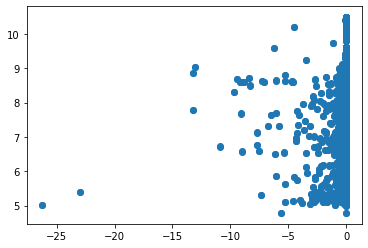

In [13]:
final1 = np.array(nFile0.NodeResultFlow)
finalArray1 = np.append(final1,nFile1.NodeResultFlow)
final2 = np.array(nFile0.NodePressure)
finalArray2 = np.append(final2,nFile1.NodePressure)
plt.scatter(finalArray1, finalArray2)

In [14]:
def pressDeviation(file0, file1):
    res_arr = file1
    res_arr['PressureDeviation']= file1.NodePressure
    res_arr['FlowDeviation']= file1.NodeResultFlow
    res_arr.FlowDeviation = abs(res_arr.NodeResultFlow.subtract(file0.NodeResultFlow))/file0.NodeResultFlow
    res_arr.PressureDeviation = abs(res_arr.PressureDeviation.subtract(file0.NodePressure))/file0.NodePressure
    return res_arr

In [25]:
stationpath = '/Users/aya/Documents/NYU/ConEdison Leak Detection/NYU_LeakData/Reduced Node Set/nodeStations_StafordAve_TableToExcel.csv'
stationNodes=pd.read_csv(stationpath)

dirplotpath = '/Users/aya/Documents/NYU/ConEdison Leak Detection/graphs/stationing/'

In [20]:
preDir = "/LeakData_ZeroDegrees/"
leakFreeZero = "NYU Anamoly Data_ZeroDeg_Nodes"
nameZero_01="NYU Anamoly Data_ZeroDeg_Nodes_Leak1"
nameZero_11="NYU Anamoly Data_ZeroDeg_Nodes_Leak11"
nameZero_21="NYU Anamoly Data_ZeroDeg_Nodes_Leak21"
nameZero_31="NYU Anamoly Data_ZeroDeg_Nodes_Leak31"
nameZero_41="NYU Anamoly Data_ZeroDeg_Nodes_Leak41"
filetype = ".csv"

leakZero_00 = get_file(preDir+leakFreeZero+filetype)
leakZero_01 = get_file(preDir+nameZero_01+filetype)
leakZero_11 = get_file(preDir+nameZero_11+filetype)
leakZero_21 = get_file(preDir+nameZero_21+filetype)
leakZero_31 = get_file(preDir+nameZero_31+filetype)
leakZero_41 = get_file(preDir+nameZero_41+filetype)

resZero_01 = pressDeviation(leakZero_00,leakZero_01)
resZero_11 = pressDeviation(leakZero_00,leakZero_11)
resZero_21 = pressDeviation(leakZero_00,leakZero_21)
resZero_31 = pressDeviation(leakZero_00,leakZero_31)
resZero_41 = pressDeviation(leakZero_00,leakZero_41)

NPDdir = "/Users/aya/Documents/NYU/ConEdison Leak Detection/NPD/"
resZero_01.to_csv(NPDdir + nameZero_01 + '_NPD.csv')
resZero_11.to_csv(NPDdir + nameZero_11 + '_NPD.csv')
resZero_21.to_csv(NPDdir + nameZero_21 + '_NPD.csv')
resZero_31.to_csv(NPDdir + nameZero_31 + '_NPD.csv')
resZero_41.to_csv(NPDdir + nameZero_41 + '_NPD.csv')

In [24]:
preDir = "/LeakData_16Degrees/"
leakFree16 = "NYU Anamoly Data_16Deg_Nodes"
name16_01="NYU Anamoly Data_16Deg_Nodes_Leak1"
name16_11="NYU Anamoly Data_16Deg_Nodes_Leak11"
name16_21="NYU Anamoly Data_16Deg_Nodes_Leak21"
name16_31="NYU Anamoly Data_16Deg_Nodes_Leak31"
name16_41="NYU Anamoly Data_16Deg_Nodes_Leak41"
filetype = ".csv"

leak16_00 = get_file(preDir+leakFree16+filetype)
leak16_01 = get_file(preDir+name16_01+filetype)
leak16_11 = get_file(preDir+name16_11+filetype)
leak16_21 = get_file(preDir+name16_21+filetype)
leak16_31 = get_file(preDir+name16_31+filetype)
leak16_41 = get_file(preDir+name16_41+filetype)

res1_16 = pressDeviation(leak16_00,leak16_01)
res11_16 = pressDeviation(leak16_00,leak16_11)
res21_16 = pressDeviation(leak16_00,leak16_21)
res31_16 = pressDeviation(leak16_00,leak16_31)
res41_16 = pressDeviation(leak16_00,leak16_41)

NPDdir = "/Users/aya/Documents/NYU/ConEdison Leak Detection/NPD/"
res1_16.to_csv(NPDdir + name16_01 + '_NPD.csv')
res11_16.to_csv(NPDdir + name16_11 + '_NPD.csv')
res21_16.to_csv(NPDdir + name16_21 + '_NPD.csv')
res31_16.to_csv(NPDdir + name16_31 + '_NPD.csv')
res41_16.to_csv(NPDdir + name16_41 + '_NPD.csv')



In [23]:
preDir = "/LeakData_32Degrees/"
leakFree32 = "NYU Anamoly Data_32Deg_Nodes"
name32_01="NYU Anamoly Data_32Deg_Nodes_Leak1"
name32_11="NYU Anamoly Data_32Deg_Nodes_Leak11"
name32_21="NYU Anamoly Data_32Deg_Nodes_Leak21"
name32_31="NYU Anamoly Data_32Deg_Nodes_Leak31"
name32_41="NYU Anamoly Data_32Deg_Nodes_Leak41"
filetype = ".csv"

leak32_00 = get_file(preDir+leakFree32+filetype)
leak32_01 = get_file(preDir+name32_01+filetype)
leak32_11 = get_file(preDir+name32_11+filetype)
leak32_21 = get_file(preDir+name32_21+filetype)
leak32_31 = get_file(preDir+name32_31+filetype)
leak32_41 = get_file(preDir+name32_41+filetype)

res32_1 = pressDeviation(leak32_00,leak32_01)
res32_11 = pressDeviation(leak32_00,leak32_11)
res32_21 = pressDeviation(leak32_00,leak32_21)
res32_31 = pressDeviation(leak32_00,leak32_31)
res32_41 = pressDeviation(leak32_00,leak32_41)

NPDdir = "/Users/aya/Documents/NYU/ConEdison Leak Detection/NPD/"
res32_1.to_csv(NPDdir + name32_01 + '_NPD.csv')
res32_11.to_csv(NPDdir + name32_11 + '_NPD.csv')
res32_21.to_csv(NPDdir + name32_21 + '_NPD.csv')
res32_31.to_csv(NPDdir + name32_31 + '_NPD.csv')
res32_41.to_csv(NPDdir + name32_41 + '_NPD.csv')




In [22]:
preDir = "/LeakData_48Degrees/"
leakFree48 = "NYU Anamoly Data_48Deg_Nodes"
name48_01="NYU Anamoly Data_48Deg_Nodes_Leak1"
name48_11="NYU Anamoly Data_48Deg_Nodes_Leak11"
name48_21="NYU Anamoly Data_48Deg_Nodes_Leak21"
name48_31="NYU Anamoly Data_48Deg_Nodes_Leak31"
name48_41="NYU Anamoly Data_48Deg_Nodes_Leak41"
filetype = ".csv"

leak48_00 = get_file(preDir+leakFree48+filetype)
leak48_01 = get_file(preDir+name48_01+filetype)
leak48_11 = get_file(preDir+name48_11+filetype)
leak48_21 = get_file(preDir+name48_21+filetype)
leak48_31 = get_file(preDir+name48_31+filetype)
leak48_41 = get_file(preDir+name48_41+filetype)

res48_1 = pressDeviation(leak48_00,leak48_01)
res48_11 = pressDeviation(leak48_00,leak48_11)
res48_21 = pressDeviation(leak48_00,leak48_21)
res48_31 = pressDeviation(leak48_00,leak48_31)
res48_41 = pressDeviation(leak48_00,leak48_41)

NPDdir = "/Users/aya/Documents/NYU/ConEdison Leak Detection/NPD/"
res48_1.to_csv(NPDdir + name48_01 + '_NPD.csv')
res48_11.to_csv(NPDdir + name48_11 + '_NPD.csv')
res48_21.to_csv(NPDdir + name48_21 + '_NPD.csv')
res48_31.to_csv(NPDdir + name48_31 + '_NPD.csv')
res48_41.to_csv(NPDdir + name48_41 + '_NPD.csv')





In [21]:
preDir = "/LeakData_64Degrees/"
leakFree64 = "NYU Anamoly Data_64Deg_Nodes"
name64_01="NYU Anamoly Data_64Deg_Nodes_Leak1"
name64_11="NYU Anamoly Data_64Deg_Nodes_Leak11"
name64_21="NYU Anamoly Data_64Deg_Nodes_Leak21"
name64_31="NYU Anamoly Data_64Deg_Nodes_Leak31"
name64_41="NYU Anamoly Data_64Deg_Nodes_Leak41"
filetype = ".csv"

leak64_00 = get_file(preDir+leakFree64+filetype)
leak64_01 = get_file(preDir+name64_01+filetype)
leak64_11 = get_file(preDir+name64_11+filetype)
leak64_21 = get_file(preDir+name64_21+filetype)
leak64_31 = get_file(preDir+name64_31+filetype)
leak64_41 = get_file(preDir+name64_41+filetype)

res64_1 = pressDeviation(leak64_00,leak64_01)
res64_11 = pressDeviation(leak64_00,leak64_11)
res64_21 = pressDeviation(leak64_00,leak64_21)
res64_31 = pressDeviation(leak64_00,leak64_31)
res64_41 = pressDeviation(leak64_00,leak64_41)

NPDdir = "/Users/aya/Documents/NYU/ConEdison Leak Detection/NPD/"
res64_1.to_csv(NPDdir + name64_01 + '_NPD.csv')
res64_11.to_csv(NPDdir + name64_11 + '_NPD.csv')
res64_21.to_csv(NPDdir + name64_21 + '_NPD.csv')
res64_31.to_csv(NPDdir + name64_31 + '_NPD.csv')
res64_41.to_csv(NPDdir + name64_41 + '_NPD.csv')

In [91]:
def station_nodes_plotter(input_df, template_df):
    
    unique_nodes = template_df.NAME.unique()
    reduced_nodeDf = input_df[input_df.NAME.isin(unique_nodes)]
    reduced_nodeDf.reset_index(inplace = True, drop = True)
    station_nodeDf = pd.merge(reduced_nodeDf,template_df, how = 'left')
    
    def station_plot(station_nodeDf, save=False):
        Y = np.array(station_nodeDf['PressureDeviation'])
        X = station_nodeDf.STATION
        
        lower = 0.0
        upper = 0.3
        tq_arr = (Y-0.0)/(0.3-0.0)
        tq2 = [float(i) for i in tq_arr]

        colors = ["#1a1aff", "#00cc00", "#ffff00", "#ffa500", "#ff4d4d"]
        cmap= matplotlib.colors.ListedColormap(colors)
        cmap.set_under("crimson")
        cmap.set_over("w")
        norm= matplotlib.colors.Normalize(vmin=lower,vmax=upper)
        mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)
        cc = cmap(tq2)

        fig_size = plt.rcParams["figure.figsize"]
        fig_size[0] = 10
        fig_size[1] = 10
        plt.rcParams["figure.figsize"] = fig_size

        plt.ylim([lower,upper+0.0001])
        plt.yticks(np.arange(lower, upper+0.0001, step=(upper/5)))
        plt.xticks(np.arange(0, 12000, step=500), rotation=45)
        
        plt.scatter(X, Y, edgecolor='none', alpha=1.0,c = cc, cmap=cmap)
        plt.colorbar(matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap), ticks = np.arange(lower, upper+0.0001, step=(upper/5)))
        
        if save is not False:
            plt.savefig(plotname)
            plt.show()
        else:
            plt.show()
        
        return

    station_plot(station_nodeDf)



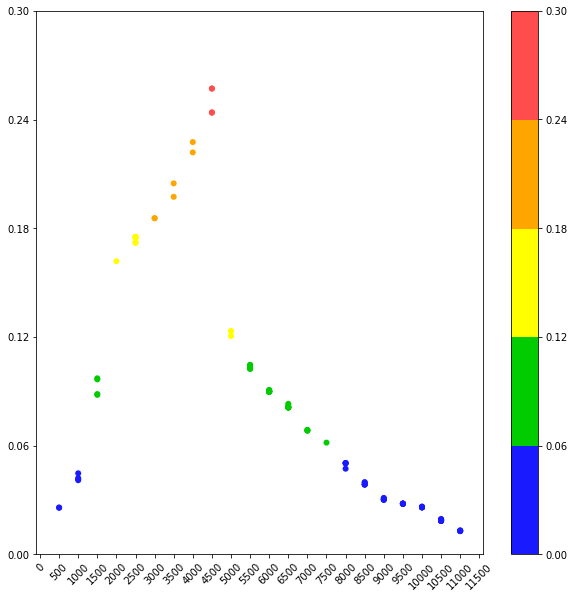

In [92]:
plotname = dirplotpath+nameZero_41+"_stations.png"

station_nodes_plotter(resZero_41, stationNodes)


In [93]:
    unique_nodes = template_df.NAME.unique()
    reduced_nodeDf = input_df[input_df.NAME.isin(unique_nodes)]
    reduced_nodeDf.reset_index(inplace = True, drop = True)
    station_nodeDf = pd.merge(reduced_nodeDf,template_df, how = 'left')
y = np.array(station_nodeDf['PressureDeviation'])
x = np.array(station_nodeDf['STATION'])

NameError: name 'station_nodeDf' is not defined

In [208]:
def draw_graph(graphArr):
    cntrlnd = '0BEC50B8'

    G = nx.Graph()

    pos_dict = defaultdict(list)
    for i, j, k in zip(graphArr.NAME,graphArr.NodeXCoordinate,graphArr.NodeYCoordinate):
        pos_dict[i].append(j)
        pos_dict[i].append(k)
    pos_dict0 = dict(pos_dict)

    nodepressure_dict0 = {val:item for val, item in zip(graphArr.NAME,graphArr.PressureDeviation)}

    node_list = list(graphArr.NAME)
    G.add_nodes_from(pos_dict0.keys())
    for n in node_list:
        G.nodes[n]['pos'] = pos_dict0[n]
        G.nodes[n]['pressure'] = nodepressure_dict0[n]

    for i, label in enumerate(pipesdf0['NAME']):
        pdest = pipesdf0['FacilityToNodeName'].iloc[i]
        psource = pipesdf0['FacilityFromNodeName'].iloc[i]
        pressure = pipesdf0['PipeAvePressure'].iloc[i]
        name = pipesdf0['NAME'].iloc[i]
        G.add_edge(psource, pdest, p = pressure, n = name)

    n_data = list(G.nodes(data=True))
    p_data = list(G.edges(data=True))

    nodeinfo = nx.get_node_attributes(G, 'pressure')
    nodeinfo[cntrlnd]

    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 30
    fig_size[1] = 30
    plt.rcParams["figure.figsize"] = fig_size
    print("Current size:", fig_size)

    labels = {}
    labels[cntrlnd] = r'$\delta$'
    
    lower =0.0
    upper=0.3
    colors = ["#1a1aff", "#00cc00", "#ffff00", "#ffa500", "#ff4d4d"]
    cmap= matplotlib.colors.ListedColormap(colors)
    cmap.set_under("crimson")
    cmap.set_over("w")
    norm= matplotlib.colors.Normalize(vmin=lower,vmax=upper)

    nodes = G.nodes()
    ec = nx.draw_networkx_edges(G, pos = pos_dict0, alpha=1)
    nc = nx.draw_networkx_nodes(G, pos = pos_dict0, nodelist=nodes, node_color=graphArr['PressureDeviation'], with_labels=False, node_size=25, cmap=cmap, vmin=0.0, vmax=0.3)
    lc = nx.draw_networkx_labels(G, pos = pos_dict0, labels = labels, font_size=32, font_color='r')
    
    plt.colorbar(nc)
    plt.axis('off')
    #plt.savefig("/Users/kavyaub/Documents/mySubjects/ConEdison/screenshots/press5.png")
    plt.show()

Current size: [30, 30]


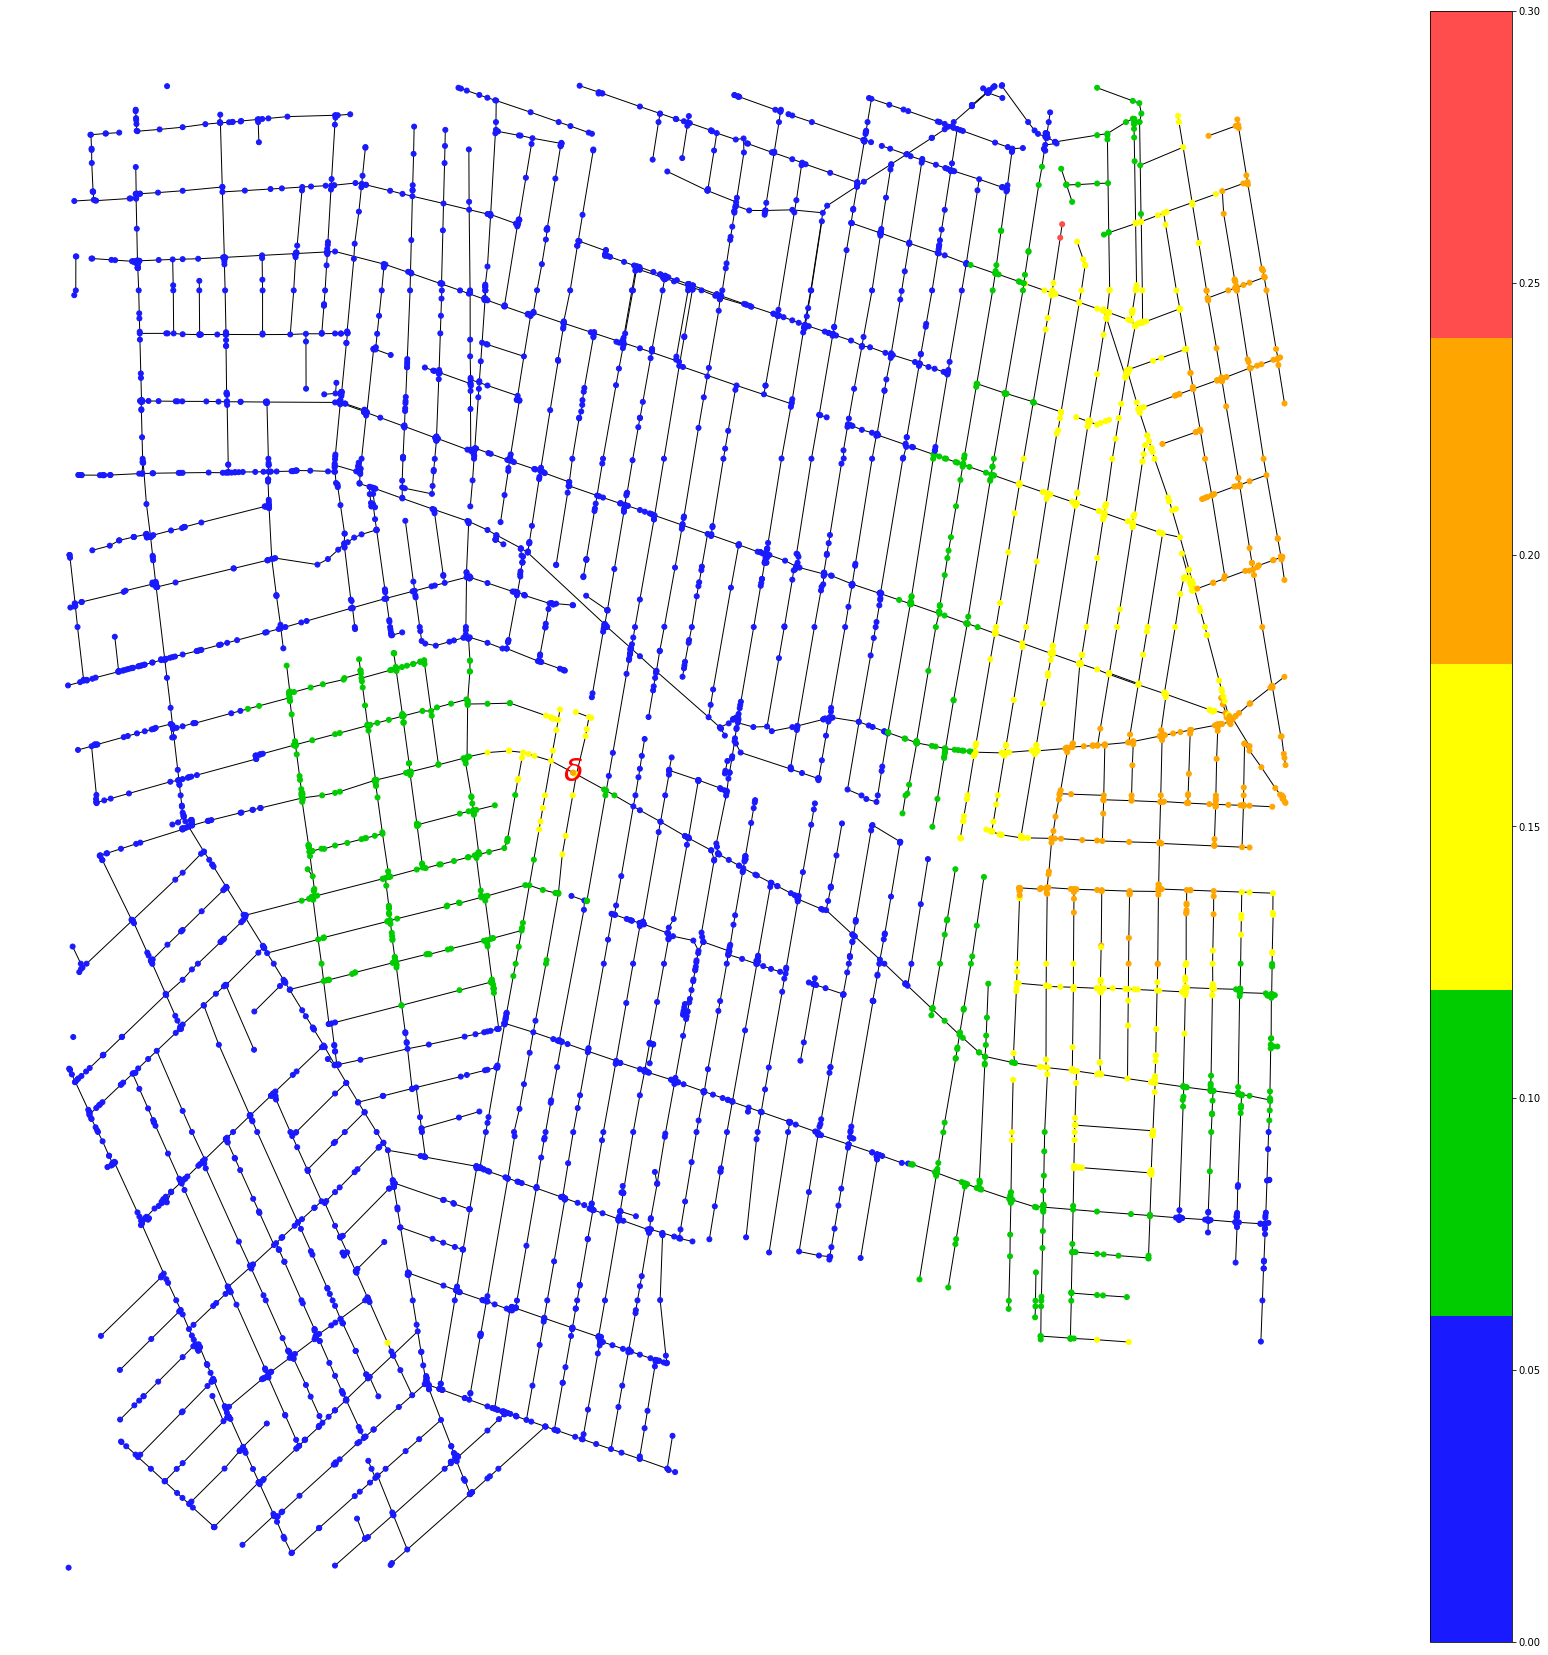

In [209]:
ppipes = toplevelpath + all_datadir + "/LeakData_16Degrees/NYU Anamoly Data_16Deg_Pipes.csv"
pipesdf0 = pd.read_csv(ppipes)

draw_graph(res41)

In [36]:
#############
#refer to https://www.idtools.com.au/3d-network-graphs-python-mplot3d-toolkit/
##############

import warnings
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from mpl_toolkits.mplot3d import Axes3D

matplotlib_axes_logger.setLevel('ERROR')

def draw_3d(graphArr):

    cntrlnd = '0BEC50B8'

    G = nx.Graph()

    pos_dict = defaultdict(list)
    for i, j, k in zip(graphArr.NAME,graphArr.NodeXCoordinate,graphArr.NodeYCoordinate):
        pos_dict[i].append(j)
        pos_dict[i].append(k)
    pos_dict0 = dict(pos_dict)

    nodepressure_dict0 = {val:item for val, item in zip(graphArr.NAME,graphArr.PressureDeviation)}

    d3pos_dict = defaultdict(list)
    for d in (pos_dict0, nodepressure_dict0): # you can list as many input dicts as you want here
        for key, value in d.items():
            d3pos_dict[key].append(value)
    d3pos_dict0 = dict(d3pos_dict)

    node_list = list(graphArr.NAME)
    G.add_nodes_from(pos_dict0.keys())
    for n in node_list:
        G.nodes[n]['pos'] = pos_dict0[n]
        G.nodes[n]['pressure'] = nodepressure_dict0[n]

    for i, label in enumerate(pipesdf0['NAME']):
        pdest = pipesdf0['FacilityToNodeName'].iloc[i]
        psource = pipesdf0['FacilityFromNodeName'].iloc[i]
        pressure = pipesdf0['PipeAvePressure'].iloc[i]
        name = pipesdf0['NAME'].iloc[i]
        G.add_edge(psource, pdest, p = pressure, n = name)

    def network_plot_3D(G, angle, save=False):
        
        lower = 0.0
        upper = 0.3
        colors = plt.cm.jet((graphArr.PressureDeviation-lower)/(upper-lower))
        
        tp2 = (graphArr.PressureDeviation-lower)/(upper-lower)
        colors = ["#1a1aff", "#00cc00", "#ffff00", "#ffa500", "#ff4d4d"]
        cmap= matplotlib.colors.ListedColormap(colors)
        cmap.set_under("crimson")
        cmap.set_over("w")
        norm= matplotlib.colors.Normalize(vmin=lower,vmax=upper)
        mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)
        cc = cmap(tp2)


        # 3D network plot
        with plt.style.context(('ggplot')):

            fig = plt.figure(figsize=(30,30))
            ax = Axes3D(fig)
            ax.set_xlabel('x-coordinates',fontsize=30)
            ax.set_ylabel('y-coordinates',fontsize=30)
            ax.set_zlabel('Pressure Deviation', fontsize=30)
            ax.set_zlim(0.0,0.3)


            # Loop on the pos dictionary to extract the x,y,z coordinates of each node
            ctr=0
            for key, value in d3pos_dict0.items():
                xi = value[0][0]
                yi = value[0][1]
                zi = value[1]

                # Scatter plot
                ax.scatter(xi, yi, zi,c=cc[ctr], edgecolors='k', alpha=0.5, s=80)
                ctr=ctr+1

            # Loop on the list of edges to get the x,y,z, coordinates of the connected nodes
            # Those two points are the extrema of the line to be plotted
            for i,j in enumerate(G.edges()):
                x = np.array((d3pos_dict0[j[0]][0][0], d3pos_dict0[j[1]][0][0]))
                y = np.array((d3pos_dict0[j[0]][0][1], d3pos_dict0[j[1]][0][1]))
                z = np.array((d3pos_dict0[j[0]][1], d3pos_dict0[j[1]][1]))

            # Plot the connecting lines
                ax.plot(x, y, z, c='black',alpha=0.5)

        # Set the initial view
        angleVerticle = 30
        ax.view_init(angleVerticle, angle)
        ax.zaxis.set_tick_params(labelsize='22',pad=17)
        ax.zaxis.labelpad = 40
        ax.xaxis.labelpad = 20
        ax.yaxis.labelpad = 20
        # Hide the axes
        #ax.set_axis_off()

        if save is not False:
            plt.savefig("/Users/kavyaub/Documents/mySubjects/ConEdison/screenshots/Leak_1_ZeroDegrees.png")
            plt.show()
        else:
            plt.show()

        return

    network_plot_3D(G, 60)

In [37]:
color_picker=np.array([[0,0,0,0,0],[0,0,1,1,1],[0,1,2,2,2],[1,2,2,3,3],[1,2,3,3,4],[2,2,3,4,4]])
color_picker
def color_indexer(input_arr):
    out_arr=np.array(input_arr)
    for i in range(0,input_arr[0].size):
        out_arr[0,i]=color_picker[input_arr[0,i]][0]
        out_arr[1,i]=color_picker[input_arr[1,i]][1]
        out_arr[2,i]=color_picker[input_arr[2,i]][2]
        out_arr[3,i]=color_picker[input_arr[3,i]][3]
        out_arr[4,i]=color_picker[input_arr[4,i]][4]

    return out_arr

In [ ]:
scaled_vals=np.array([res0_1.PressureDeviation ,res0_11.PressureDeviation,res0_21.PressureDeviation,res0_31.PressureDeviation, res0_41.PressureDeviation])
scaled_vals[scaled_vals > 0.24] = 5
scaled_vals[scaled_vals <=0.03] = 6
scaled_vals[scaled_vals <=0.06] = 1
scaled_vals[scaled_vals <=0.12] = 2
scaled_vals[scaled_vals <=0.18] = 3
scaled_vals[scaled_vals <=0.24] = 4
scaled_vals[scaled_vals == 6] = 0
scaled_vals=scaled_vals.astype(int)
colors_array = color_indexer(scaled_vals)
color_indexed0_41=res0_41
color_indexed0_41['color']=colors_array[4]
color_indexed0_31=res0_31
color_indexed0_31['color']=colors_array[3]
color_indexed0_21=res0_21
color_indexed0_21['color']=colors_array[2]
color_indexed0_11=res0_11
color_indexed0_11['color']=colors_array[1]
color_indexed0_1=res0_1
color_indexed0_1['color']=colors_array[0]

color_indexed0_1.to_csv(r'/Users/kavyaub/Documents/mySubjects/ConEdison/screenshots/leak0/leak1_pressure_deviation.csv')
color_indexed0_11.to_csv(r'/Users/kavyaub/Documents/mySubjects/ConEdison/screenshots/leak0/'+name0_11+'_pressure_deviation.csv')
color_indexed0_21.to_csv(r'/Users/kavyaub/Documents/mySubjects/ConEdison/screenshots/leak0/'+name0_21+'_pressure_deviation.csv')
color_indexed0_31.to_csv(r'/Users/kavyaub/Documents/mySubjects/ConEdison/screenshots/leak0/'+name0_31+'_pressure_deviation.csv')
color_indexed0_41.to_csv(r'/Users/kavyaub/Documents/mySubjects/ConEdison/screenshots/leak0/'+name0_41+'_pressure_deviation.csv')


In [ ]:
scaled_vals=np.array([res1.PressureDeviation ,res11.PressureDeviation,res21.PressureDeviation,res31.PressureDeviation, res41.PressureDeviation])
scaled_vals[scaled_vals > 0.24] = 5
scaled_vals[scaled_vals <=0.03] = 6
scaled_vals[scaled_vals <=0.06] = 1
scaled_vals[scaled_vals <=0.12] = 2
scaled_vals[scaled_vals <=0.18] = 3
scaled_vals[scaled_vals <=0.24] = 4
scaled_vals[scaled_vals == 6] = 0
scaled_vals=scaled_vals.astype(int)
colors_array = color_indexer(scaled_vals)
color_indexed41=res41
color_indexed41['color']=colors_array[4]
color_indexed31=res31
color_indexed31['color']=colors_array[3]
color_indexed21=res21
color_indexed21['color']=colors_array[2]
color_indexed11=res11
color_indexed11['color']=colors_array[1]
color_indexed1=res1
color_indexed1['color']=colors_array[0]

color_indexed1.to_csv(r'/Users/kavyaub/Documents/mySubjects/ConEdison/screenshots/leak16/leak1_pressure_deviation.csv')
color_indexed11.to_csv(r'/Users/kavyaub/Documents/mySubjects/ConEdison/screenshots/leak16/'+name11+'_pressure_deviation.csv')
color_indexed21.to_csv(r'/Users/kavyaub/Documents/mySubjects/ConEdison/screenshots/leak16/'+name21+'_pressure_deviation.csv')
color_indexed31.to_csv(r'/Users/kavyaub/Documents/mySubjects/ConEdison/screenshots/leak16/'+name31+'_pressure_deviation.csv')
color_indexed41.to_csv(r'/Users/kavyaub/Documents/mySubjects/ConEdison/screenshots/leak16/'+name41+'_pressure_deviation.csv')


In [ ]:
scaled_vals=np.array([res32_1.PressureDeviation ,res32_11.PressureDeviation,res32_21.PressureDeviation,res32_31.PressureDeviation, res32_41.PressureDeviation])
scaled_vals[scaled_vals > 0.24] = 5
scaled_vals[scaled_vals <=0.03] = 6
scaled_vals[scaled_vals <=0.06] = 1
scaled_vals[scaled_vals <=0.12] = 2
scaled_vals[scaled_vals <=0.18] = 3
scaled_vals[scaled_vals <=0.24] = 4
scaled_vals[scaled_vals == 6] = 0
scaled_vals=scaled_vals.astype(int)
colors_array = color_indexer(scaled_vals)
color_indexed32_41=res32_41
color_indexed32_41['color']=colors_array[4]
color_indexed32_31=res32_31
color_indexed32_31['color']=colors_array[3]
color_indexed32_21=res32_21
color_indexed32_21['color']=colors_array[2]
color_indexed32_11=res32_11
color_indexed32_11['color']=colors_array[1]
color_indexed32_1=res32_1
color_indexed32_1['color']=colors_array[0]

color_indexed32_1.to_csv(r'/Users/kavyaub/Documents/mySubjects/ConEdison/screenshots/leak32/leak1_pressure_deviation.csv')
color_indexed32_11.to_csv(r'/Users/kavyaub/Documents/mySubjects/ConEdison/screenshots/leak32/'+name32_11+'_pressure_deviation.csv')
color_indexed32_21.to_csv(r'/Users/kavyaub/Documents/mySubjects/ConEdison/screenshots/leak32/'+name32_21+'_pressure_deviation.csv')
color_indexed32_31.to_csv(r'/Users/kavyaub/Documents/mySubjects/ConEdison/screenshots/leak32/'+name32_31+'_pressure_deviation.csv')
color_indexed32_41.to_csv(r'/Users/kavyaub/Documents/mySubjects/ConEdison/screenshots/leak32/'+name32_41+'_pressure_deviation.csv')



In [ ]:
scaled_vals=np.array([res48_1.PressureDeviation ,res48_11.PressureDeviation,res48_21.PressureDeviation,res48_31.PressureDeviation, res48_41.PressureDeviation])
scaled_vals[scaled_vals > 0.24] = 5
scaled_vals[scaled_vals <=0.03] = 6
scaled_vals[scaled_vals <=0.06] = 1
scaled_vals[scaled_vals <=0.12] = 2
scaled_vals[scaled_vals <=0.18] = 3
scaled_vals[scaled_vals <=0.24] = 4
scaled_vals[scaled_vals == 6] = 0
scaled_vals=scaled_vals.astype(int)
colors_array = color_indexer(scaled_vals)
color_indexed48_41=res48_41
color_indexed48_41['color']=colors_array[4]
color_indexed48_31=res48_31
color_indexed48_31['color']=colors_array[3]
color_indexed48_21=res48_21
color_indexed48_21['color']=colors_array[2]
color_indexed48_11=res48_11
color_indexed48_11['color']=colors_array[1]
color_indexed48_1=res48_1
color_indexed48_1['color']=colors_array[0]

color_indexed48_1.to_csv(r'/Users/kavyaub/Documents/mySubjects/ConEdison/screenshots/leak48/leak1_pressure_deviation.csv')
color_indexed48_11.to_csv(r'/Users/kavyaub/Documents/mySubjects/ConEdison/screenshots/leak48/'+name48_11+'_pressure_deviation.csv')
color_indexed48_21.to_csv(r'/Users/kavyaub/Documents/mySubjects/ConEdison/screenshots/leak48/'+name48_21+'_pressure_deviation.csv')
color_indexed48_31.to_csv(r'/Users/kavyaub/Documents/mySubjects/ConEdison/screenshots/leak48/'+name48_31+'_pressure_deviation.csv')
color_indexed48_41.to_csv(r'/Users/kavyaub/Documents/mySubjects/ConEdison/screenshots/leak48/'+name48_41+'_pressure_deviation.csv')



In [39]:
scaled_vals=np.array([res64_1.PressureDeviation ,res64_11.PressureDeviation,res64_21.PressureDeviation,res64_31.PressureDeviation, res64_41.PressureDeviation])
scaled_vals[scaled_vals > 0.24] = 5
scaled_vals[scaled_vals <=0.03] = 6
scaled_vals[scaled_vals <=0.06] = 1
scaled_vals[scaled_vals <=0.12] = 2
scaled_vals[scaled_vals <=0.18] = 3
scaled_vals[scaled_vals <=0.24] = 4
scaled_vals[scaled_vals == 6] = 0
scaled_vals=scaled_vals.astype(int)
colors_array = color_indexer(scaled_vals)
color_indexed64_41=res64_41
color_indexed64_41['color']=colors_array[4]
color_indexed64_31=res64_31
color_indexed64_31['color']=colors_array[3]
color_indexed64_21=res64_21
color_indexed64_21['color']=colors_array[2]
color_indexed64_11=res64_11
color_indexed64_11['color']=colors_array[1]
color_indexed64_1=res64_1
color_indexed64_1['color']=colors_array[0]

color_indexed64_1.to_csv(r'/Users/kavyaub/Documents/mySubjects/ConEdison/screenshots/leak64/leak1_pressure_deviation.csv')
color_indexed64_11.to_csv(r'/Users/kavyaub/Documents/mySubjects/ConEdison/screenshots/leak64/'+name64_11+'_pressure_deviation.csv')
color_indexed64_21.to_csv(r'/Users/kavyaub/Documents/mySubjects/ConEdison/screenshots/leak64/'+name64_21+'_pressure_deviation.csv')
color_indexed64_31.to_csv(r'/Users/kavyaub/Documents/mySubjects/ConEdison/screenshots/leak64/'+name64_31+'_pressure_deviation.csv')
color_indexed64_41.to_csv(r'/Users/kavyaub/Documents/mySubjects/ConEdison/screenshots/leak64/'+name64_41+'_pressure_deviation.csv')


In [40]:
def draw_graph_scale(graphArr,d2plotname):
    cntrlnd = '0BEC50B8'

    G = nx.Graph()

    pos_dict = defaultdict(list)
    for i, j, k in zip(graphArr.NAME,graphArr.NodeXCoordinate,graphArr.NodeYCoordinate):
        pos_dict[i].append(j)
        pos_dict[i].append(k)
    pos_dict0 = dict(pos_dict)

    nodepressure_dict0 = {val:item for val, item in zip(graphArr.NAME,graphArr.color)}

    node_list = list(graphArr.NAME)
    G.add_nodes_from(pos_dict0.keys())
    for n in node_list:
        G.nodes[n]['pos'] = pos_dict0[n]
        G.nodes[n]['pressure'] = nodepressure_dict0[n]

    for i, label in enumerate(pipesdf0['NAME']):
        pdest = pipesdf0['FacilityToNodeName'].iloc[i]
        psource = pipesdf0['FacilityFromNodeName'].iloc[i]
        pressure = pipesdf0['PipeAvePressure'].iloc[i]
        name = pipesdf0['NAME'].iloc[i]
        G.add_edge(psource, pdest, p = pressure, n = name)

    n_data = list(G.nodes(data=True))
    p_data = list(G.edges(data=True))

    nodeinfo = nx.get_node_attributes(G, 'pressure')
    nodeinfo[cntrlnd]

    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 30
    fig_size[1] = 30
    plt.rcParams["figure.figsize"] = fig_size
    print("Current size:", fig_size)

    labels = {}
    labels[cntrlnd] = r'$\delta$'
    
    lower =0
    upper=5
    colors = ["#1a1aff", "#00cc00", "#ffff00", "#ffa500", "#ff4d4d"]
    cmap= matplotlib.colors.ListedColormap(colors)
    cmap.set_under("crimson")
    cmap.set_over("w")
    norm= matplotlib.colors.Normalize(vmin=lower,vmax=upper)

    nodes = G.nodes()
    ec = nx.draw_networkx_edges(G, pos = pos_dict0, alpha=1)
    nc = nx.draw_networkx_nodes(G, pos = pos_dict0, nodelist=nodes, node_color=graphArr['color'], with_labels=False, node_size=25, cmap=cmap, vmin=lower, vmax=upper)
    lc = nx.draw_networkx_labels(G, pos = pos_dict0, labels = labels, font_size=32, font_color='r')
    
    plt.colorbar(nc)
    plt.axis('off')
    #plt.savefig("/Users/kavyaub/Documents/mySubjects/ConEdison/screenshots/press5.png")
    plt.savefig(d2plotname)
    plt.show()

/Users/kavyaub/Documents/mySubjects/ConEdison/screenshots/screenshotsNodes_48Deg/NYU Anamoly Data_48Deg_Nodes_Leak41.csv_2D_velo_deviation.png
Current size: [30, 30]


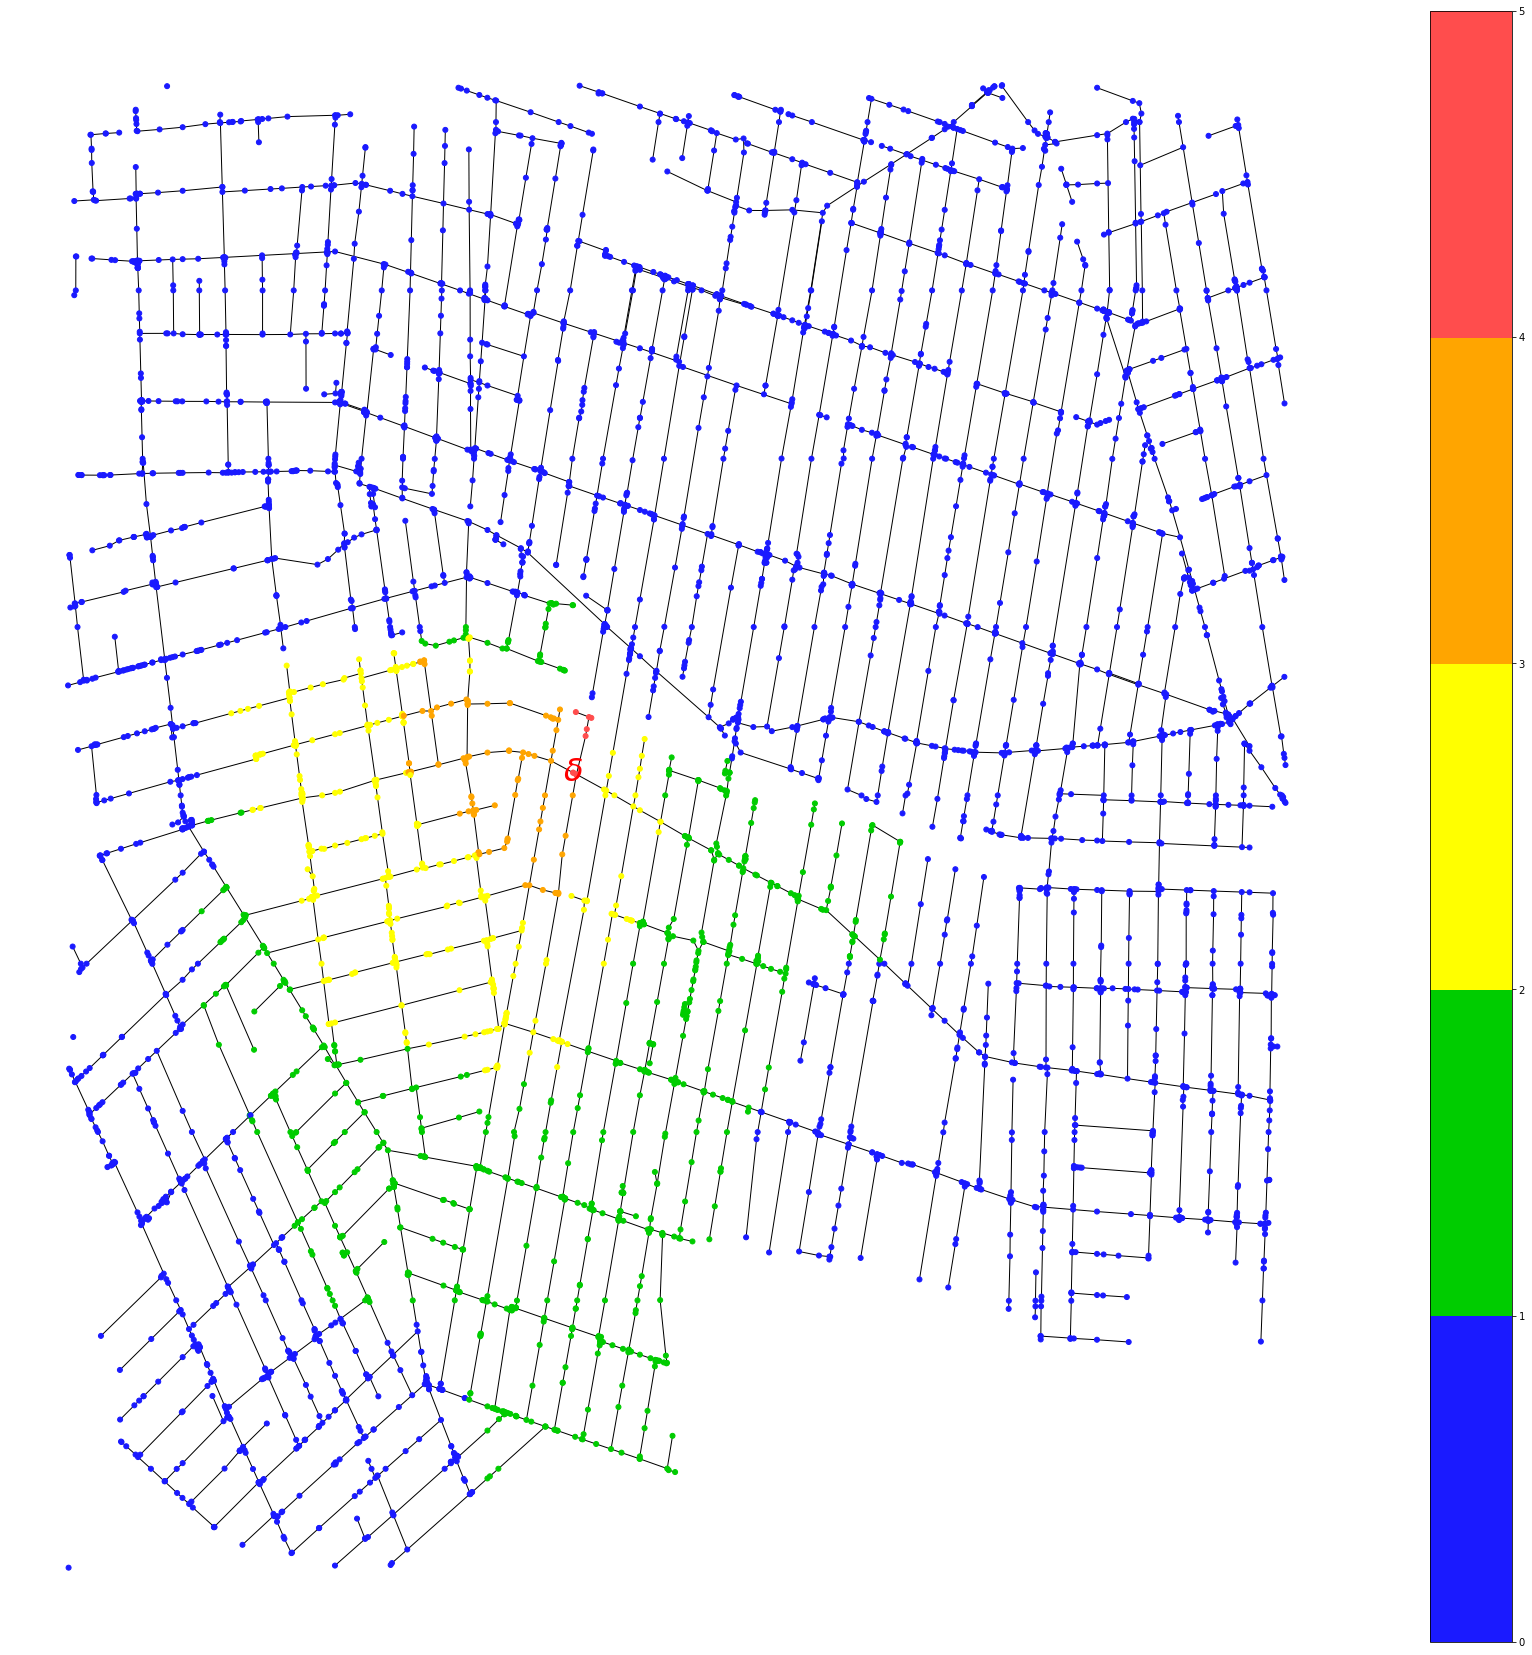

In [89]:
dirpltpath="/Users/kavyaub/Documents/mySubjects/ConEdison/screenshots/screenshotsNodes_48Deg"
d2plotname = dirpltpath+"/"+name48_41+"_2D_velo_deviation.png"
print(d2plotname)
draw_graph_scale(color_indexed48_41 ,d2plotname)

/Users/kavyaub/Documents/mySubjects/ConEdison/screenshots/screenshotsNodes_48Deg/NYU Anamoly Data_48Deg_Nodes_Leak31.csv_2D_velo_deviation.png
Current size: [30, 30]


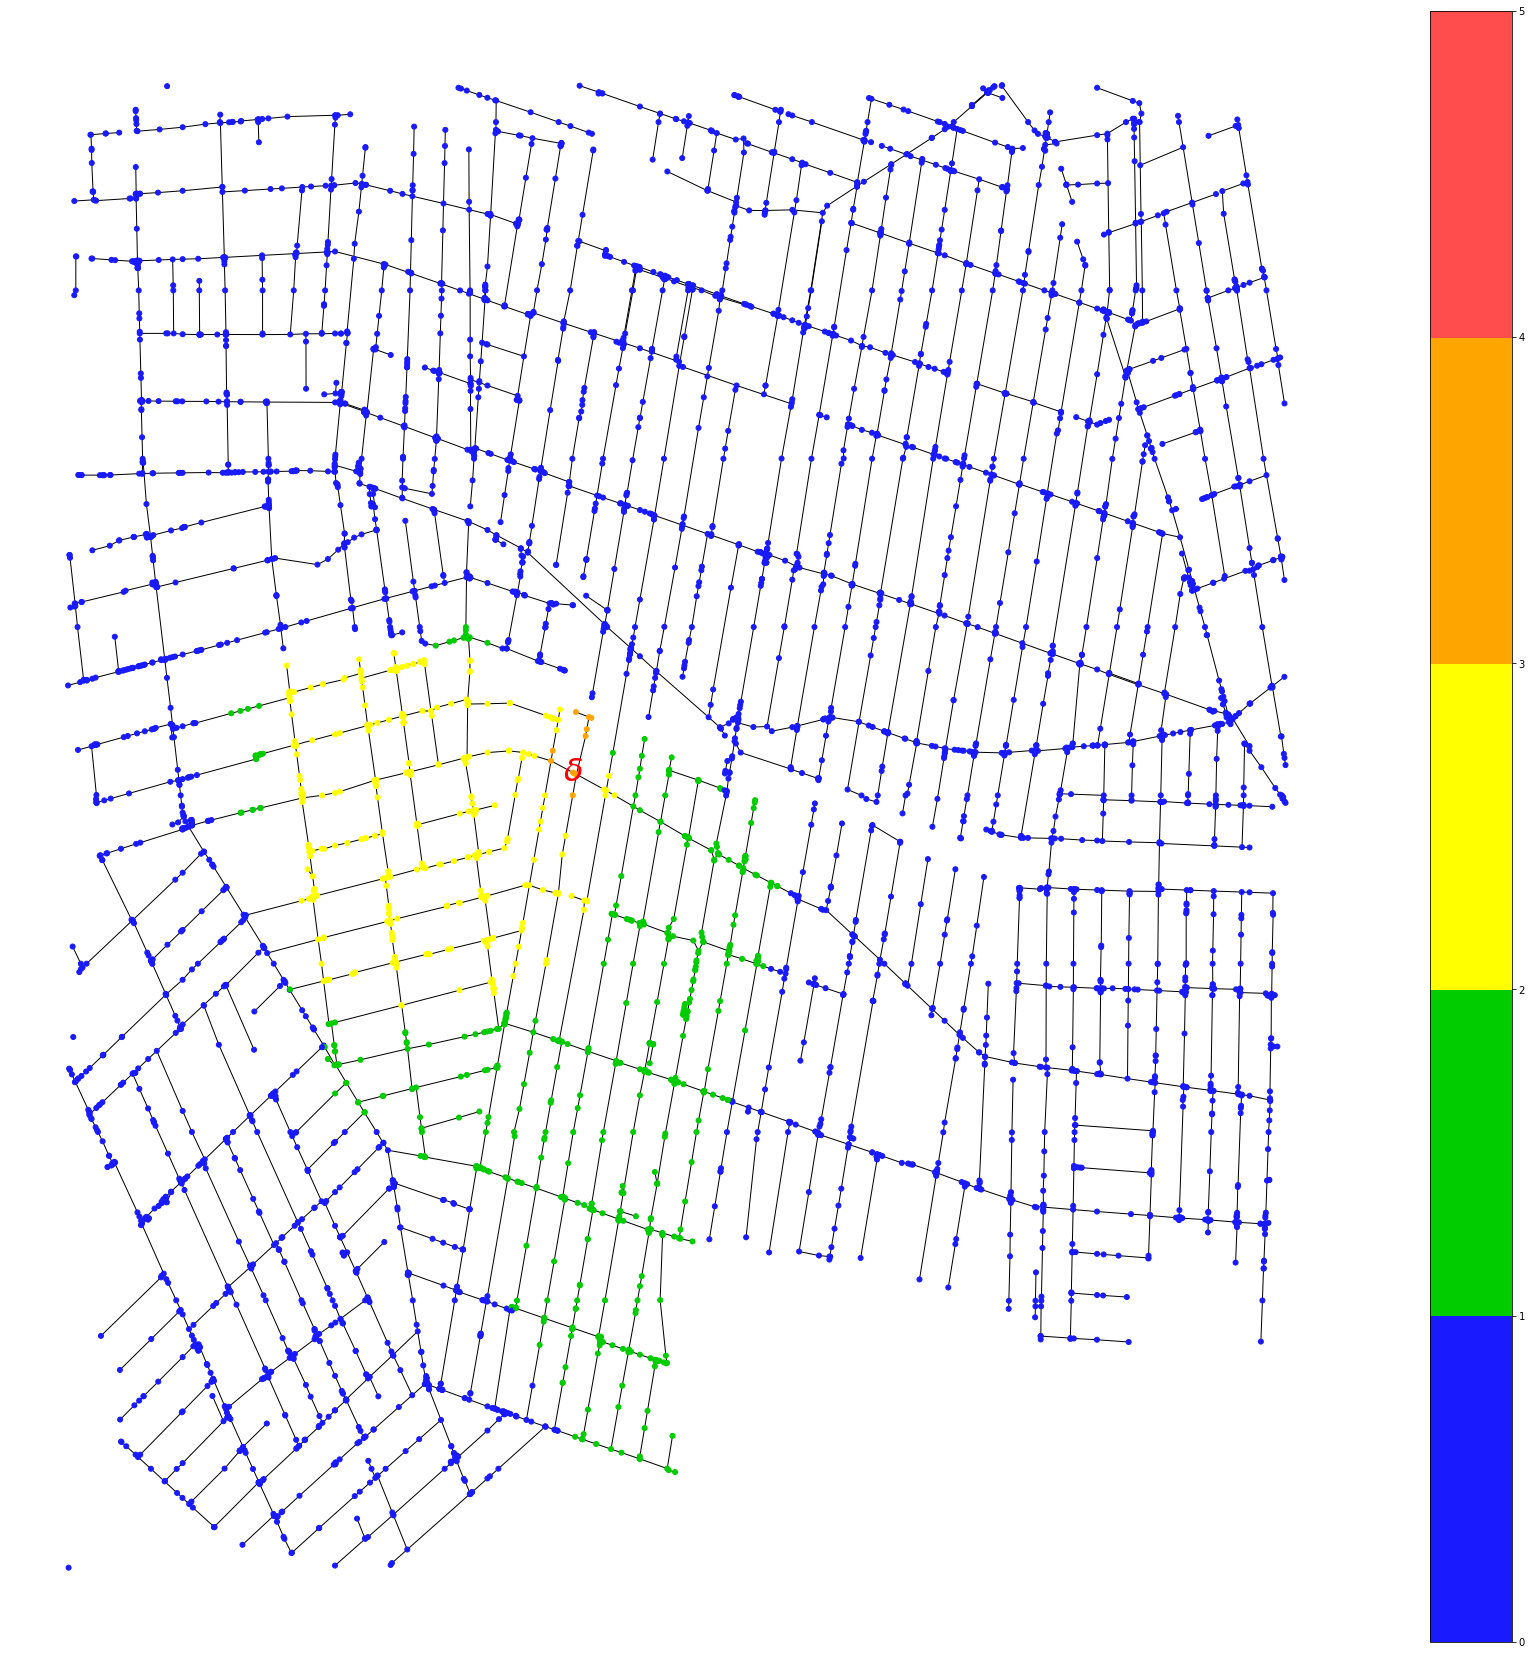

In [90]:
d2plotname = dirpltpath+"/"+name48_31+"_2D_velo_deviation.png"
print(d2plotname)
draw_graph_scale(color_indexed48_31,d2plotname)

/Users/kavyaub/Documents/mySubjects/ConEdison/screenshots/screenshotsNodes_48Deg/NYU Anamoly Data_48Deg_Nodes_Leak21.csv_2D_velo_deviation.png
Current size: [30, 30]


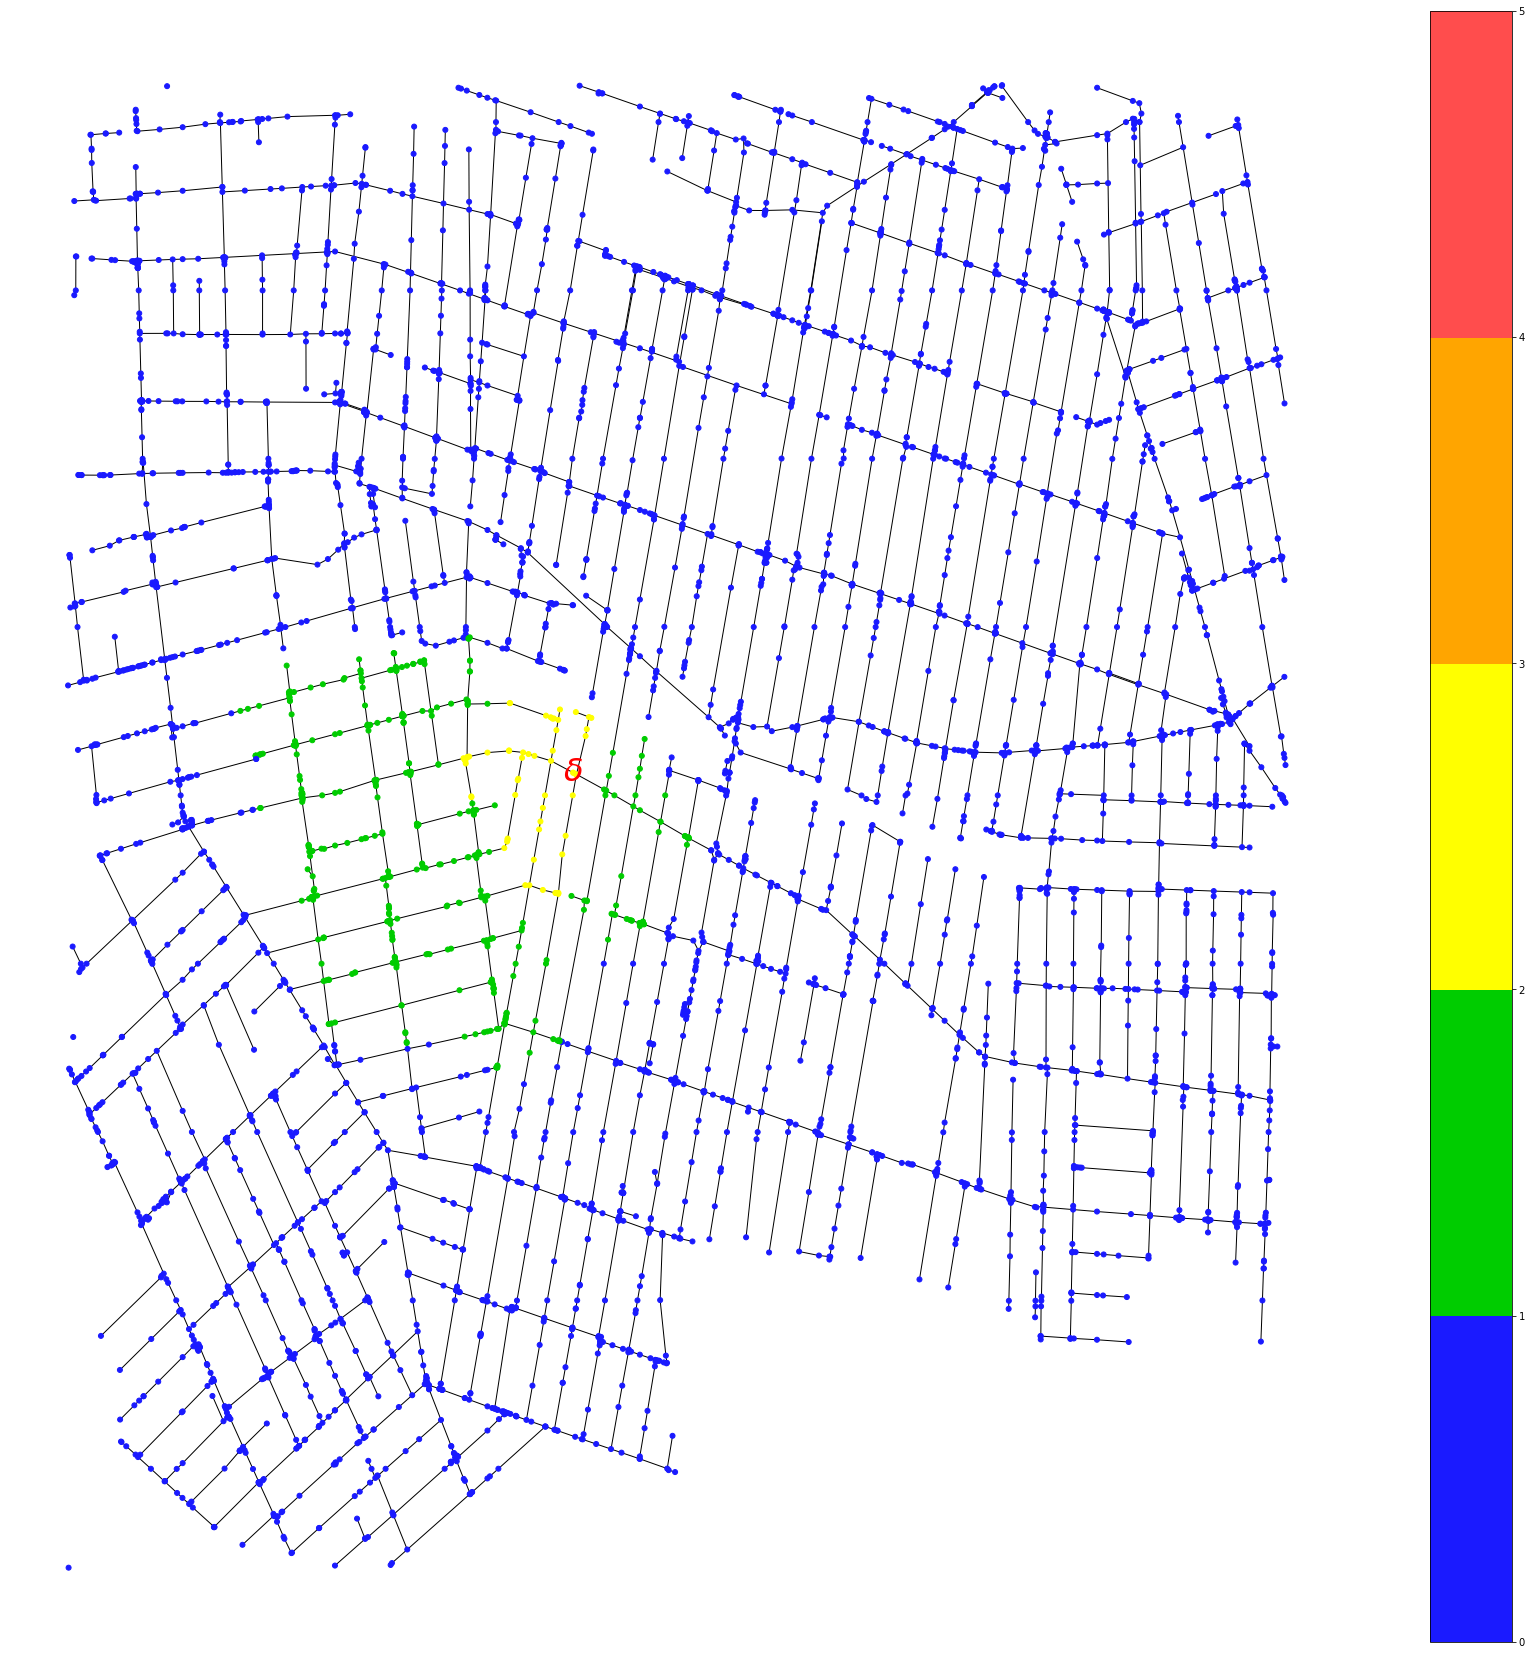

In [91]:
d2plotname = dirpltpath+"/"+name48_21+"_2D_velo_deviation.png"
print(d2plotname)
draw_graph_scale(color_indexed48_21,d2plotname)

/Users/kavyaub/Documents/mySubjects/ConEdison/screenshots/screenshotsNodes_48Deg/NYU Anamoly Data_48Deg_Nodes_Leak11.csv_2D_velo_deviation.png
Current size: [30, 30]


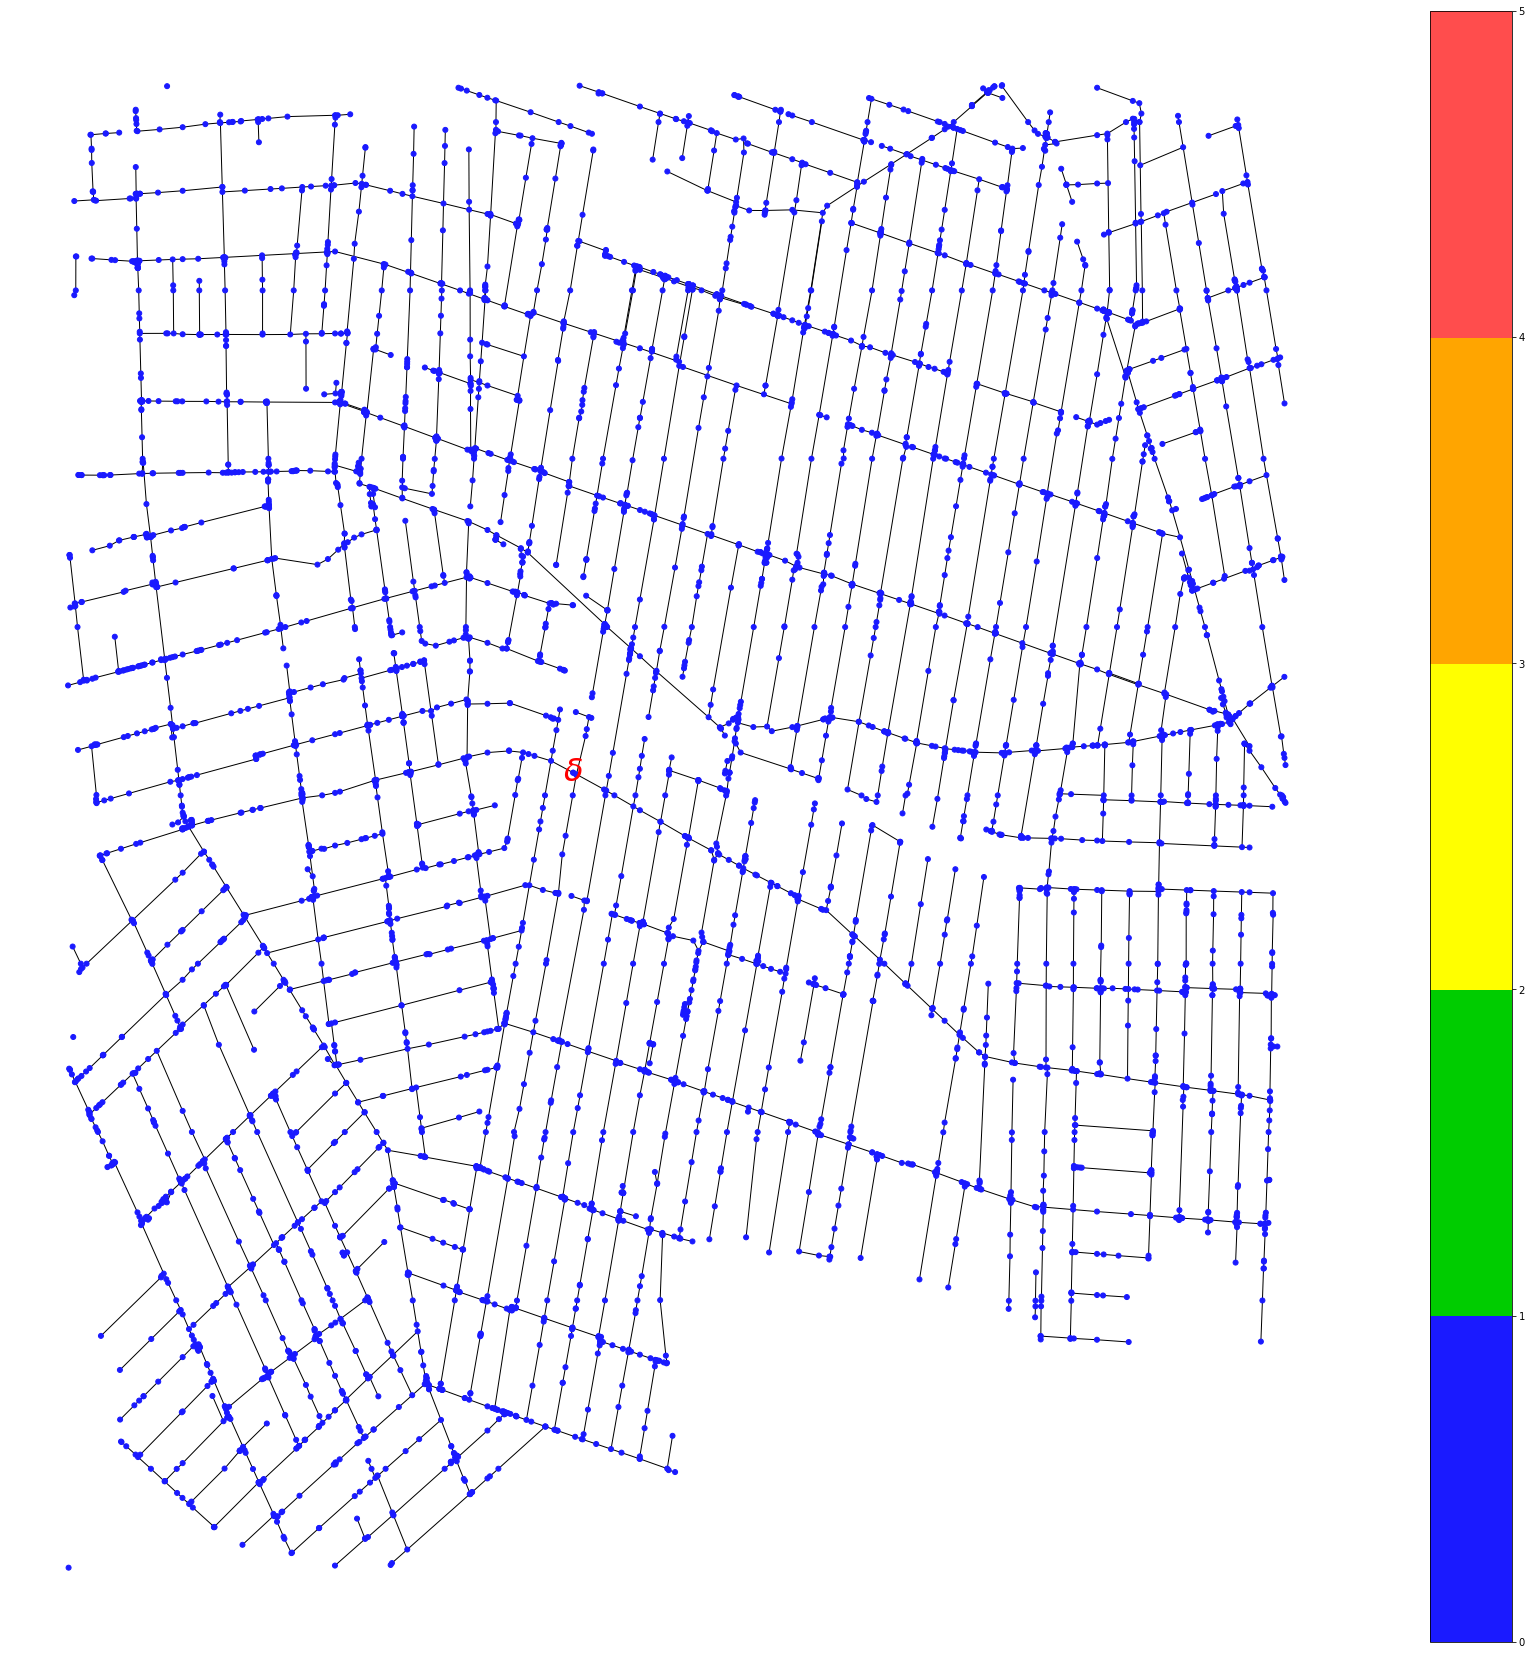

In [92]:
d2plotname = dirpltpath+"/"+name48_11+"_2D_velo_deviation.png"
print(d2plotname)
draw_graph_scale(color_indexed48_11,d2plotname)

/Users/kavyaub/Documents/mySubjects/ConEdison/screenshots/screenshotsNodes_48Deg/NYU Anamoly Data_48_Nodes_Leak1_2D_velo_deviation.png
Current size: [30, 30]


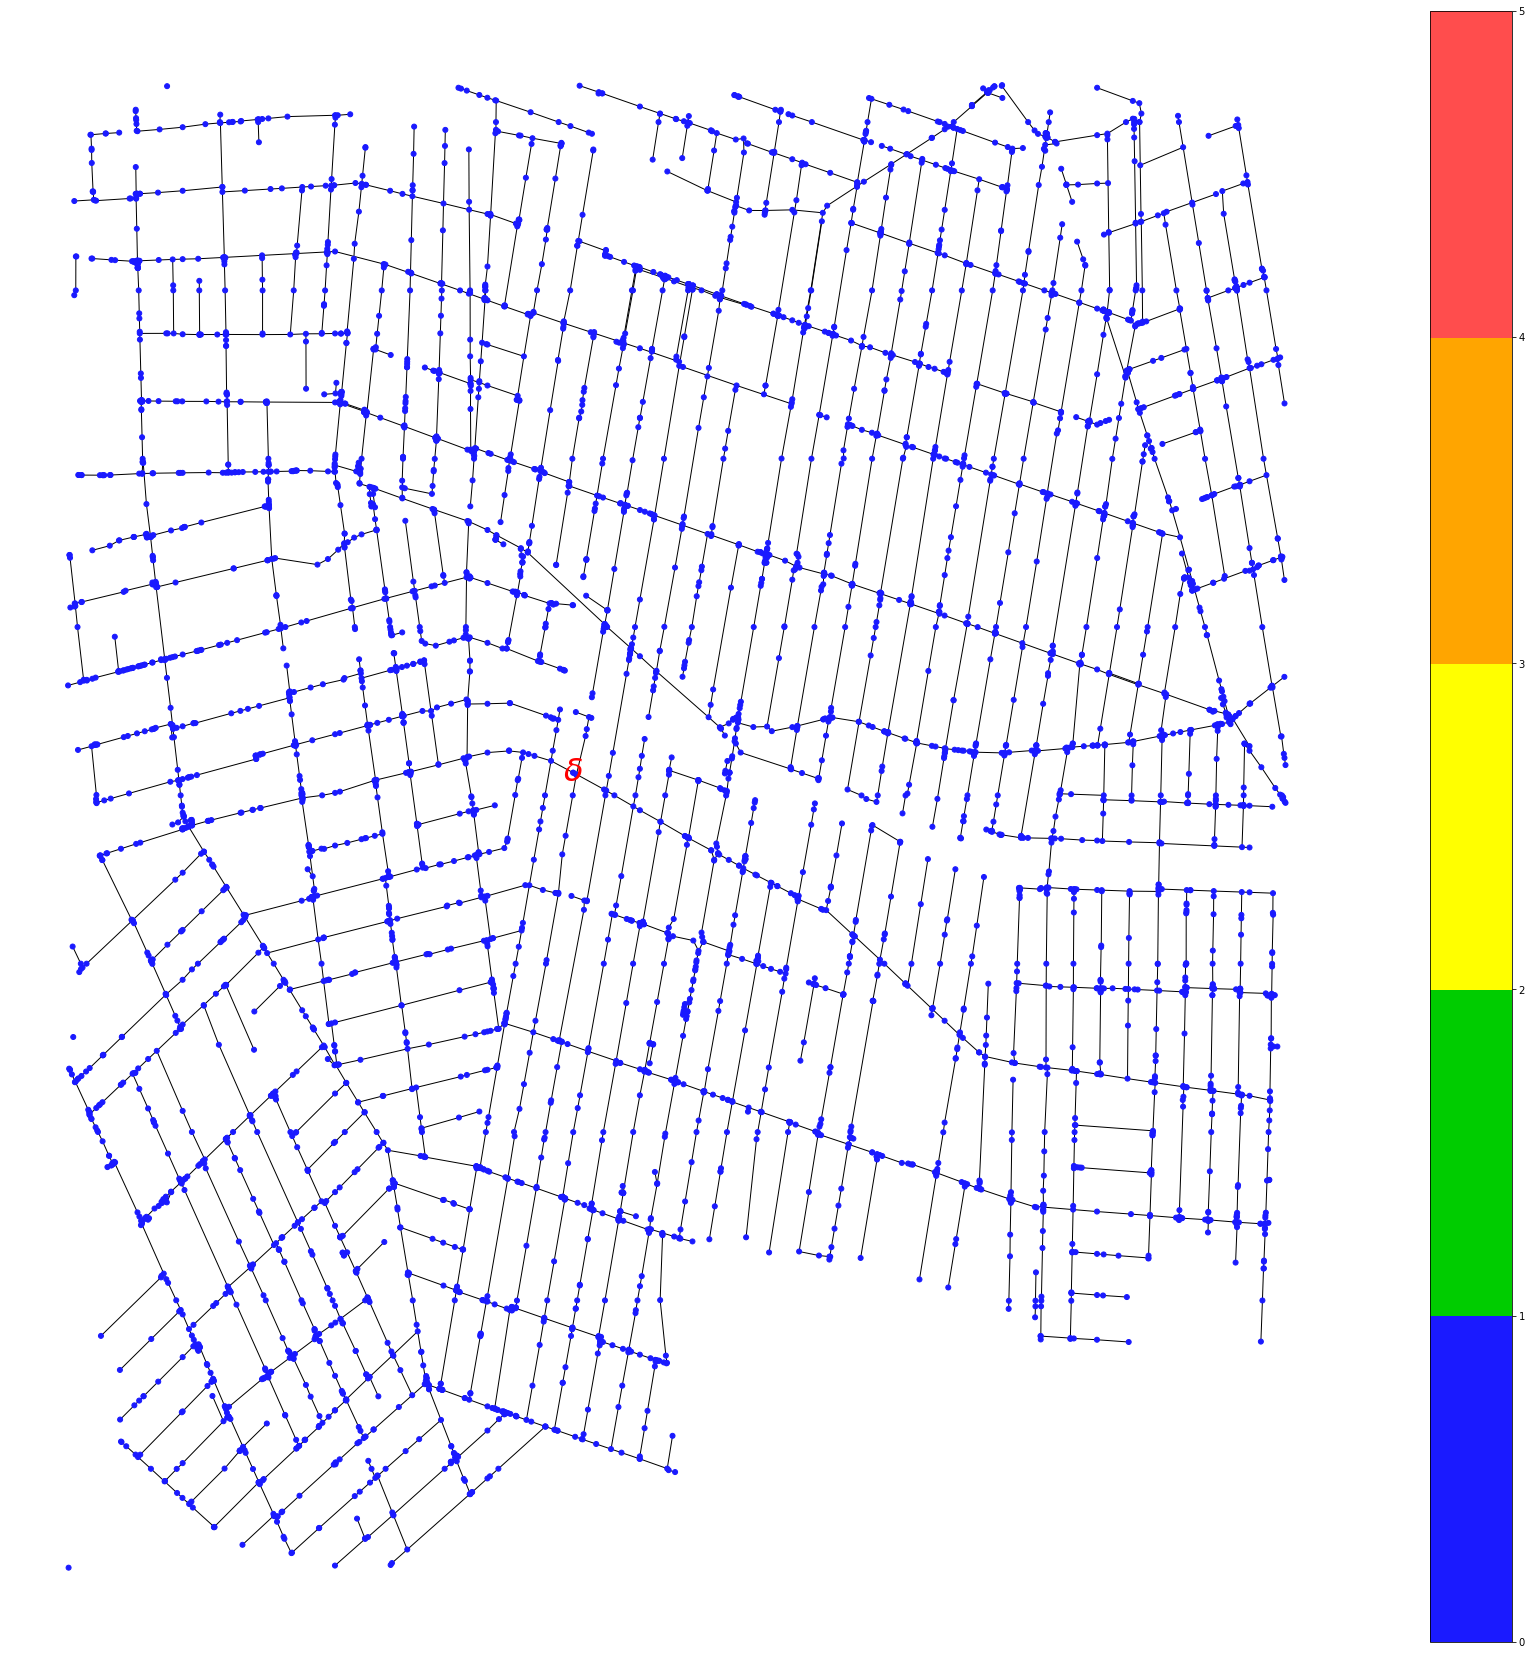

In [93]:
d2plotname = dirpltpath+"/"+"NYU Anamoly Data_48_Nodes_Leak1_2D_velo_deviation.png"
print(d2plotname)
draw_graph_scale(color_indexed48_1,d2plotname)

In [41]:
#############
#refer to https://www.idtools.com.au/3d-network-graphs-python-mplot3d-toolkit/
##############

import warnings
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from mpl_toolkits.mplot3d import Axes3D

matplotlib_axes_logger.setLevel('ERROR')

def draw_3d_color(graphArr,d2plotname):

    cntrlnd = '0BEC50B8'

    G = nx.Graph()

    pos_dict = defaultdict(list)
    for i, j, k in zip(graphArr.NAME,graphArr.NodeXCoordinate,graphArr.NodeYCoordinate):
        pos_dict[i].append(j)
        pos_dict[i].append(k)
    pos_dict0 = dict(pos_dict)

    nodepressure_dict0 = {val:item for val, item in zip(graphArr.NAME,graphArr.color)}

    d3pos_dict = defaultdict(list)
    for d in (pos_dict0, nodepressure_dict0): # you can list as many input dicts as you want here
        for key, value in d.items():
            d3pos_dict[key].append(value)
    d3pos_dict0 = dict(d3pos_dict)

    node_list = list(graphArr.NAME)
    G.add_nodes_from(pos_dict0.keys())
    for n in node_list:
        G.nodes[n]['pos'] = pos_dict0[n]
        G.nodes[n]['pressure'] = nodepressure_dict0[n]

    for i, label in enumerate(pipesdf0['NAME']):
        pdest = pipesdf0['FacilityToNodeName'].iloc[i]
        psource = pipesdf0['FacilityFromNodeName'].iloc[i]
        pressure = pipesdf0['PipeAvePressure'].iloc[i]
        name = pipesdf0['NAME'].iloc[i]
        G.add_edge(psource, pdest, p = pressure, n = name)

    def network_plot_3D(G, angle, save=True):
        
        lower = 0
        upper = 5
        #colors = plt.cm.jet((graphArr.PressureDeviation-lower)/(upper-lower))
        
        #tp2 = (graphArr.PressureDeviation-lower)/(upper-lower)
        colors = ["#1a1aff", "#00cc00", "#ffff00", "#ffa500", "#ff4d4d"]
        #cmap= matplotlib.colors.ListedColormap(colors)
        #cmap.set_under("crimson")
        #cmap.set_over("w")
        #norm= matplotlib.colors.Normalize(vmin=lower,vmax=upper)
        #mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)
        #cc = cmap(tp2)


        # 3D network plot
        with plt.style.context(('ggplot')):

            fig = plt.figure(figsize=(30,30))
            ax = Axes3D(fig)
            ax.set_xlabel('x-coordinates',fontsize=30)
            ax.set_ylabel('y-coordinates',fontsize=30)
            ax.set_zlabel('Pressure Deviation', fontsize=30)
            ax.set_zlim(lower,upper)


            # Loop on the pos dictionary to extract the x,y,z coordinates of each node
            ctr=0
            for key, value in d3pos_dict0.items():
                xi = value[0][0]
                yi = value[0][1]
                zi = value[1]

                # Scatter plot
                ax.scatter(xi, yi, zi,c=colors[zi], edgecolors='k', alpha=0.5, s=80,cmap=colors)
                ctr=ctr+1

            # Loop on the list of edges to get the x,y,z, coordinates of the connected nodes
            # Those two points are the extrema of the line to be plotted
            for i,j in enumerate(G.edges()):
                x = np.array((d3pos_dict0[j[0]][0][0], d3pos_dict0[j[1]][0][0]))
                y = np.array((d3pos_dict0[j[0]][0][1], d3pos_dict0[j[1]][0][1]))
                z = np.array((d3pos_dict0[j[0]][1], d3pos_dict0[j[1]][1]))

            # Plot the connecting lines
                ax.plot(x, y, z, c='black',alpha=0.5)

        # Set the initial view
        angleVerticle = 30
        ax.view_init(angleVerticle, angle)
        ax.zaxis.set_tick_params(labelsize='22',pad=17)
        ax.zaxis.labelpad = 40
        ax.xaxis.labelpad = 20
        ax.yaxis.labelpad = 20
        # Hide the axes
        #ax.set_axis_off()

        if save is not False:
            #plt.savefig("/Users/kavyaub/Documents/mySubjects/ConEdison/screenshots/Leak_1_ZeroDegrees.png")
            plt.savefig(d2plotname)
            plt.show()
        else:
            plt.show()

        return

    network_plot_3D(G, 60)

In [46]:
d2plotname = dirpltpath+"/"+name48_31+"_3D_velo_deviation.png"
print(d2plotname)
draw_3d_color(color_indexed48_31,d2plotname)

NameError: name 'dirpltpath' is not defined

/Users/kavyaub/Documents/mySubjects/ConEdison/screenshots/screenshotsNodes_48Deg/NYU Anamoly Data_48Deg_Nodes_Leak21.csv_3D_velo_deviation.png


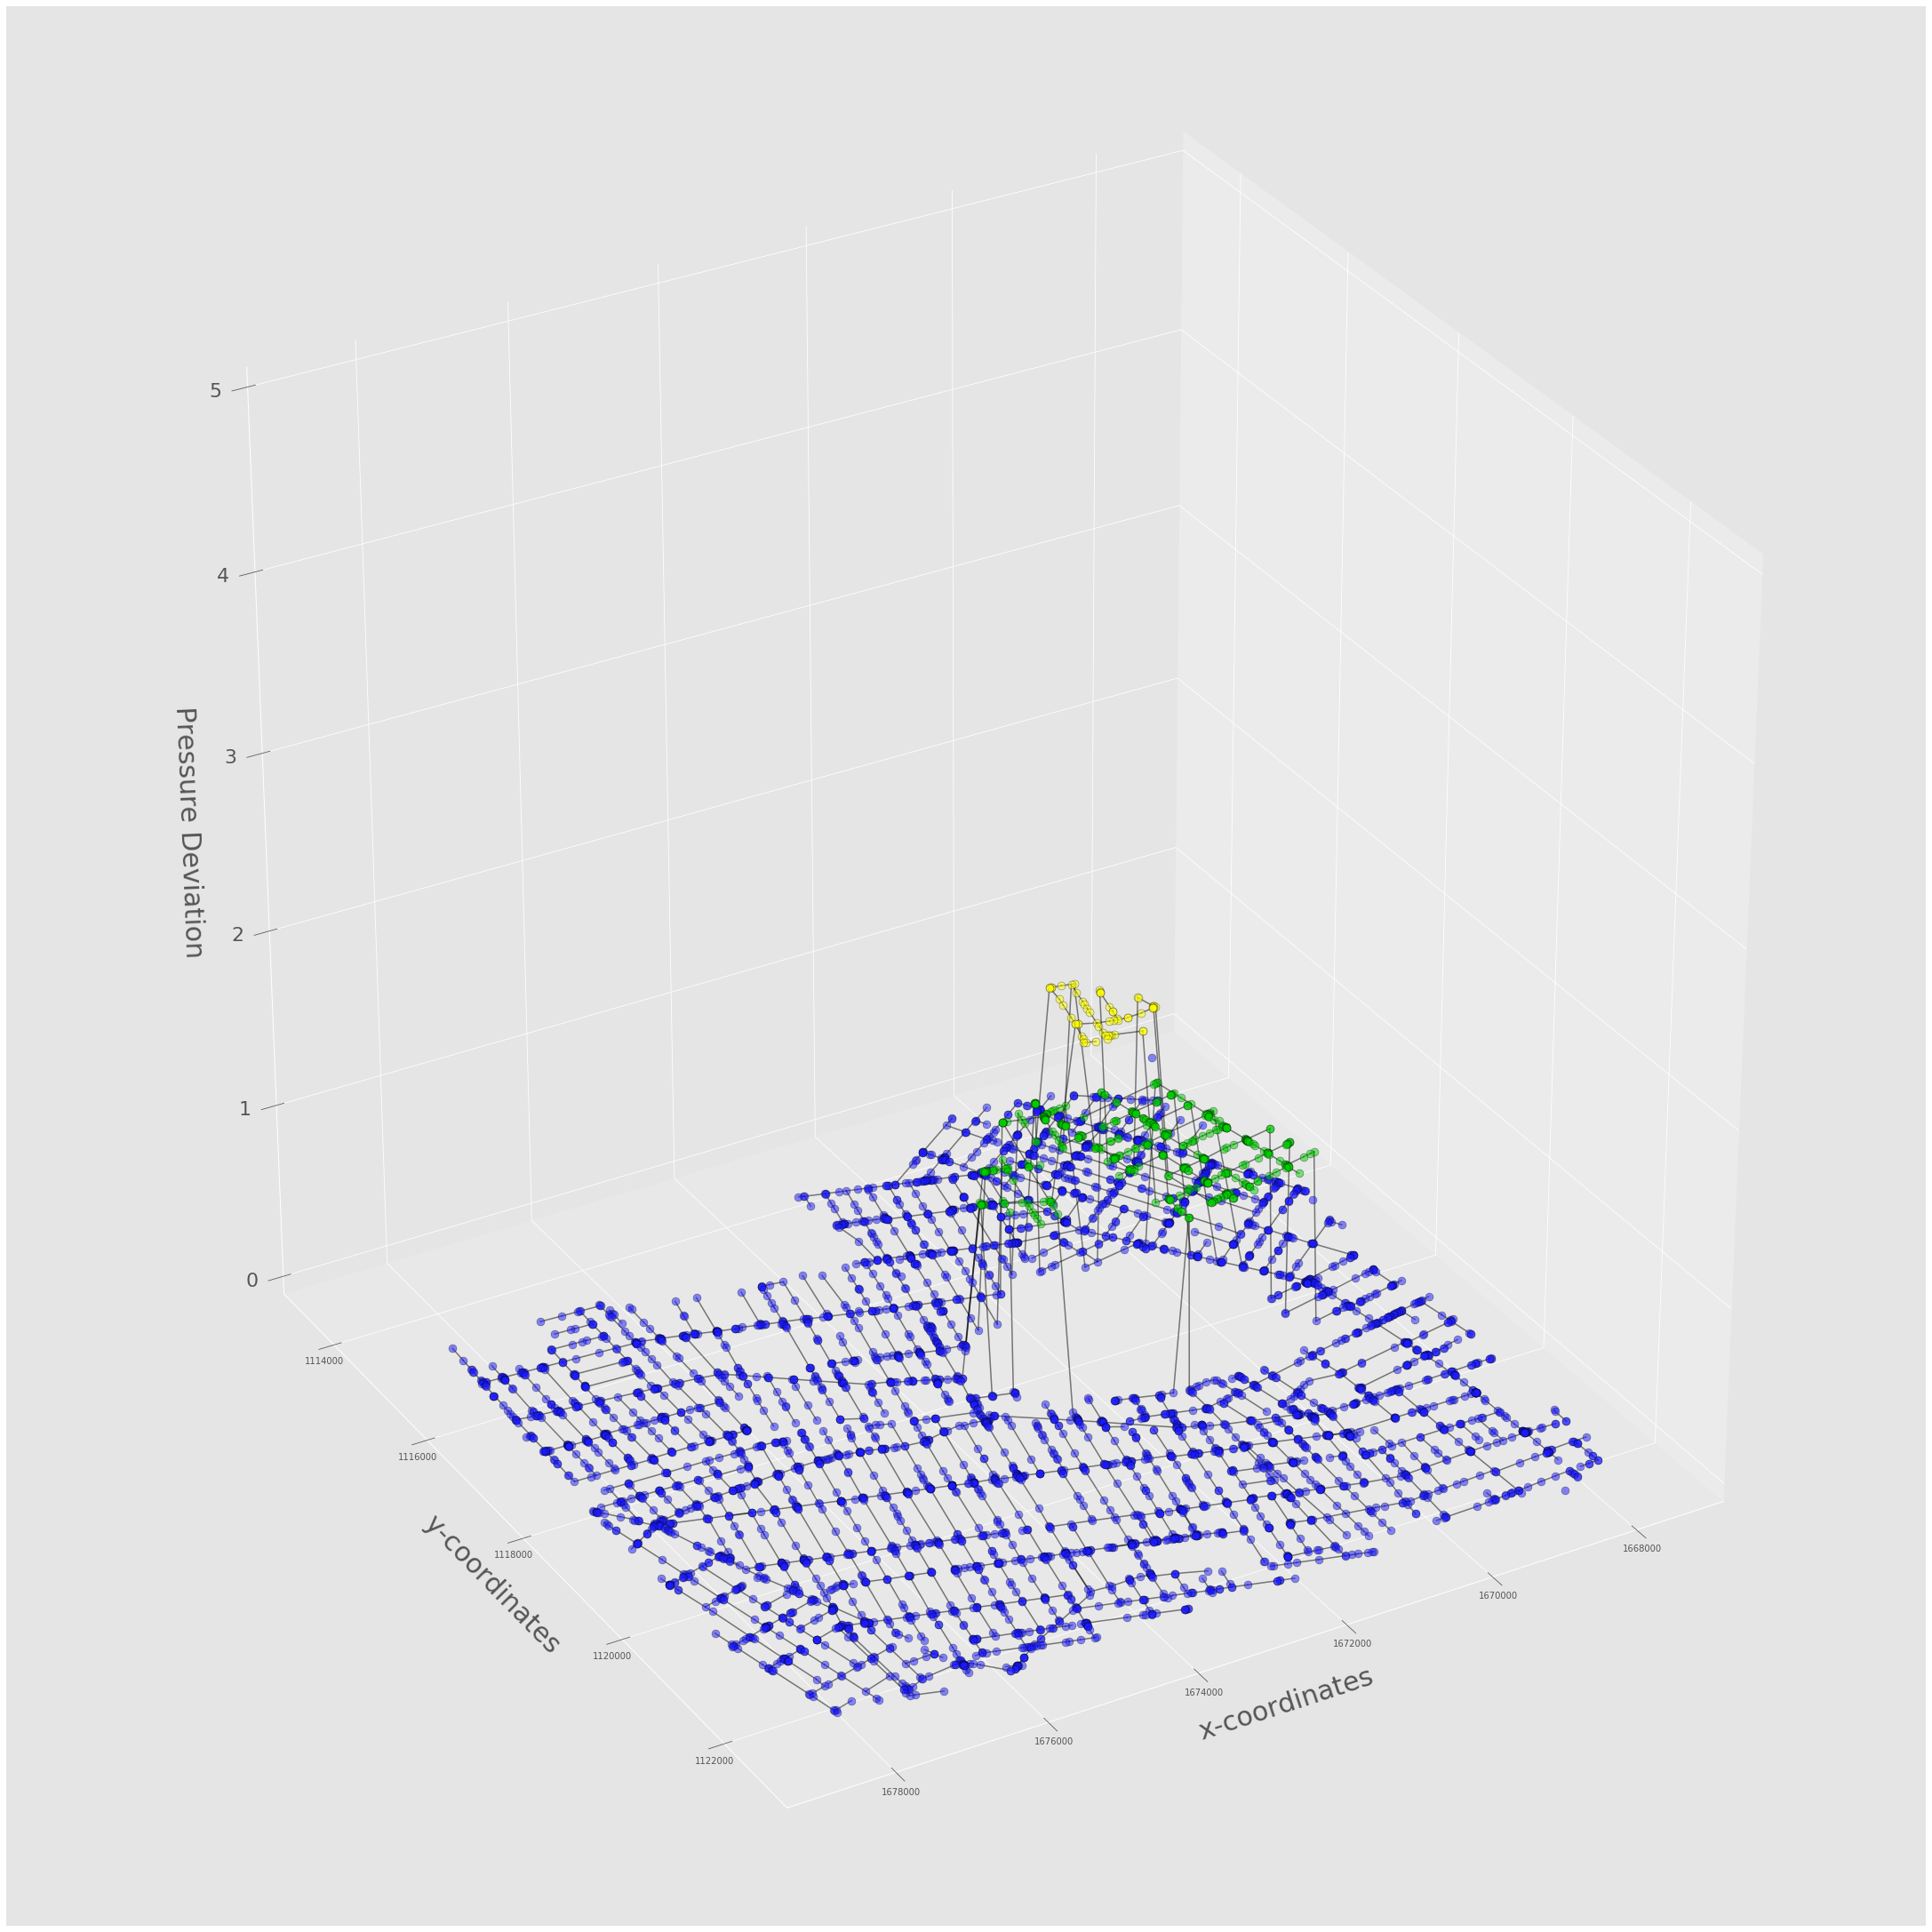

In [96]:
d2plotname = dirpltpath+"/"+name48_21+"_3D_velo_deviation.png"
print(d2plotname)
draw_3d_color(color_indexed48_21,d2plotname)

/Users/kavyaub/Documents/mySubjects/ConEdison/screenshots/screenshotsNodes_48Deg/NYU Anamoly Data_48Deg_Nodes_Leak11.csv_3D_velo_deviation.png


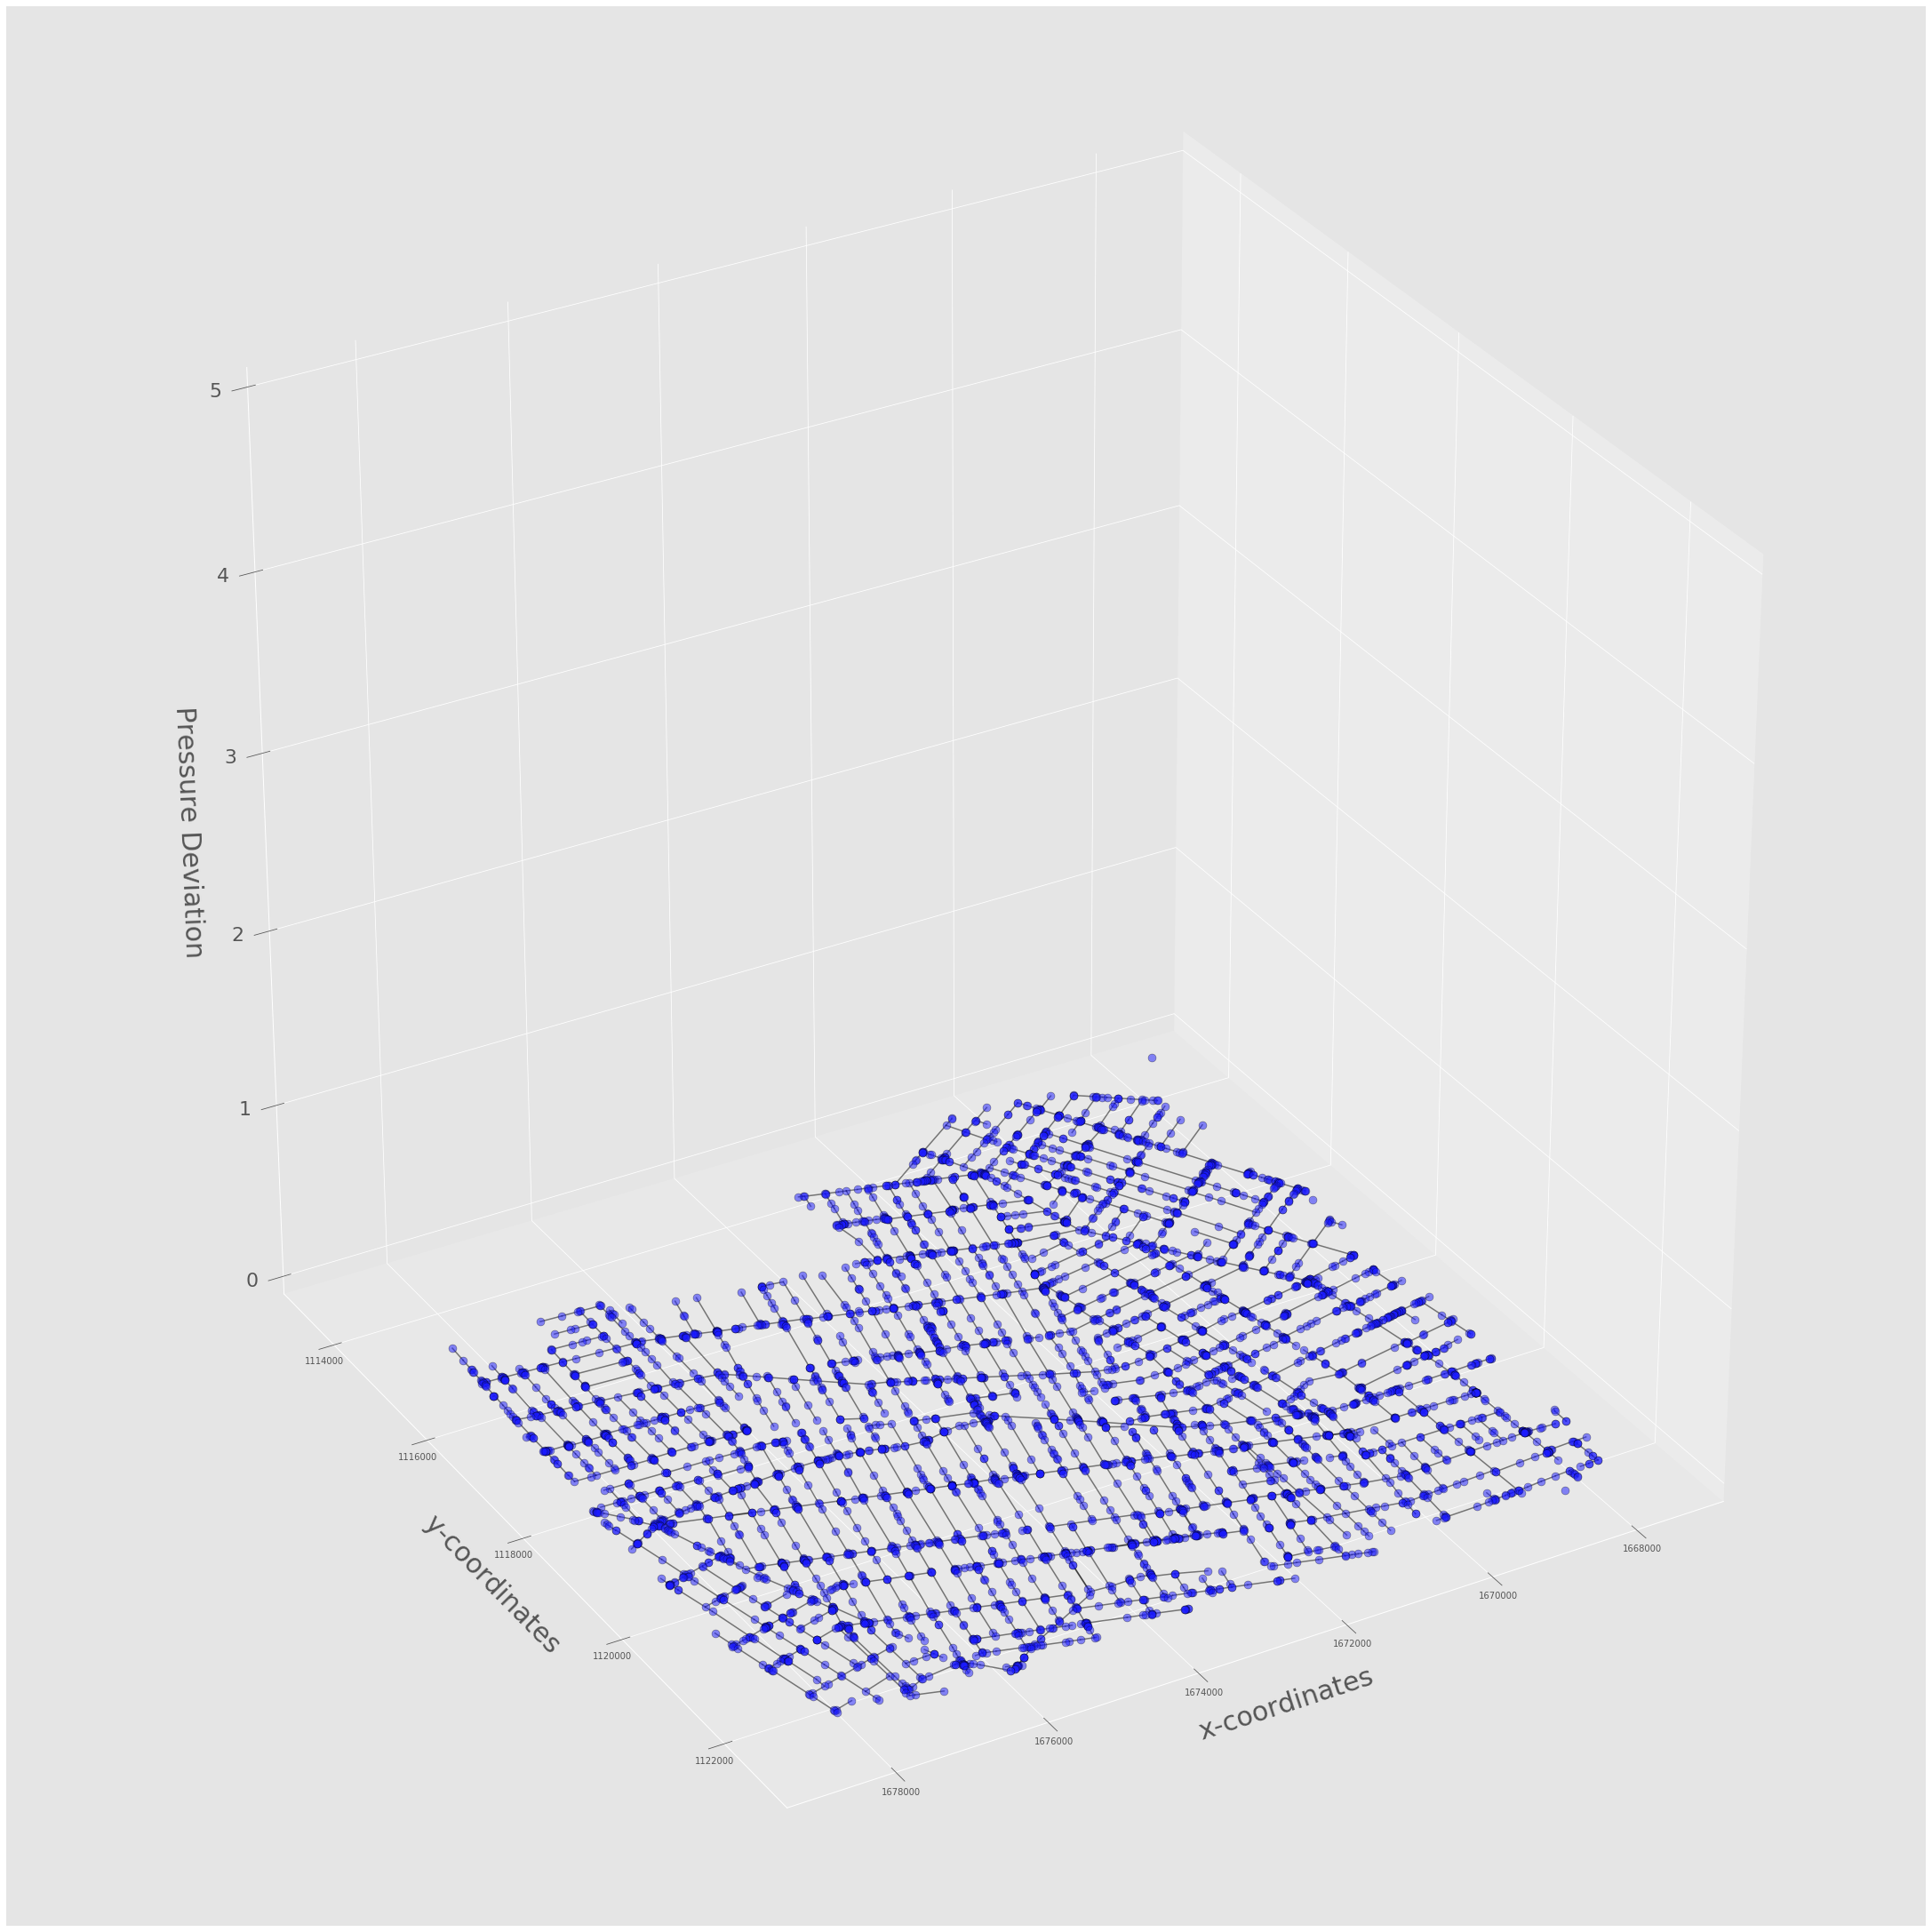

In [97]:
d2plotname = dirpltpath+"/"+name48_11+"_3D_velo_deviation.png"
print(d2plotname)
draw_3d_color(color_indexed48_11,d2plotname)

/Users/kavyaub/Documents/mySubjects/ConEdison/screenshots/screenshotsNodes_48Deg/NYU Anamoly Data_48Deg_Nodes_Leak41.csv_3D_velo_deviation.png


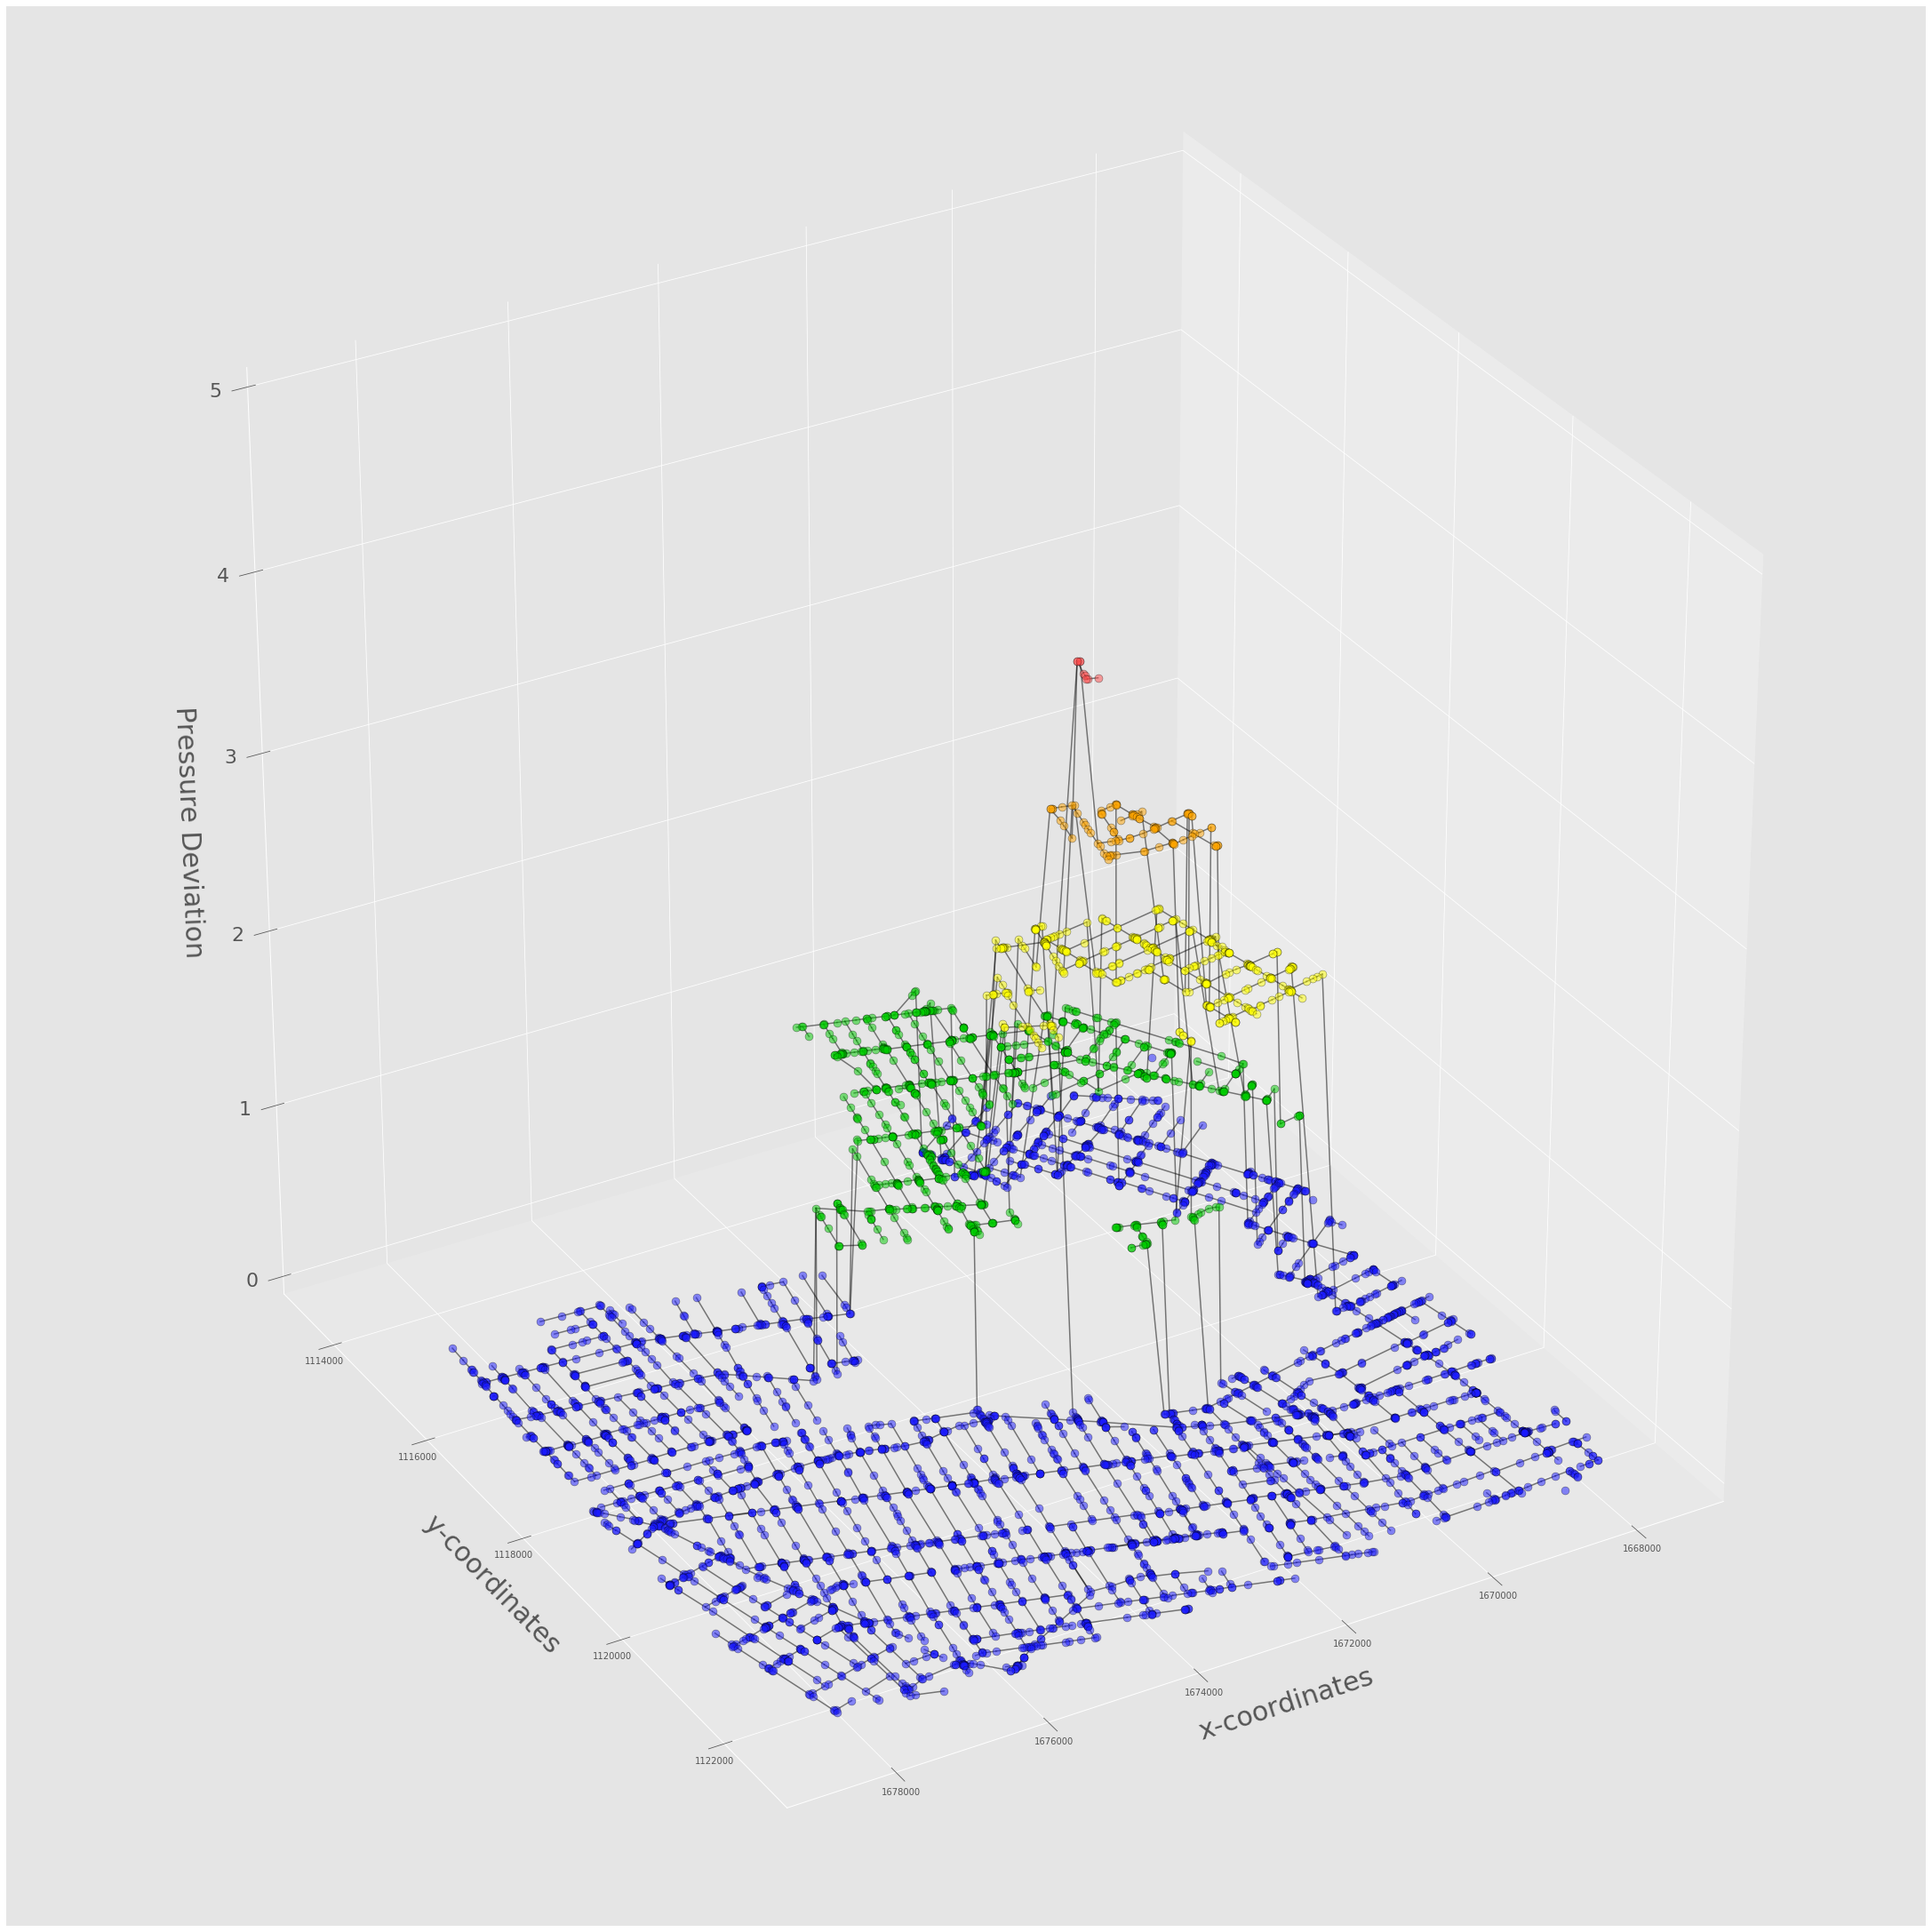

In [98]:
d2plotname = dirpltpath+"/"+name48_41+"_3D_velo_deviation.png"
print(d2plotname)
draw_3d_color(color_indexed48_41,d2plotname)

/Users/kavyaub/Documents/mySubjects/ConEdison/screenshots/screenshotsNodes_48Deg/NYU Anamoly Data_48_Nodes_Leak1_3D_velo_deviation.png


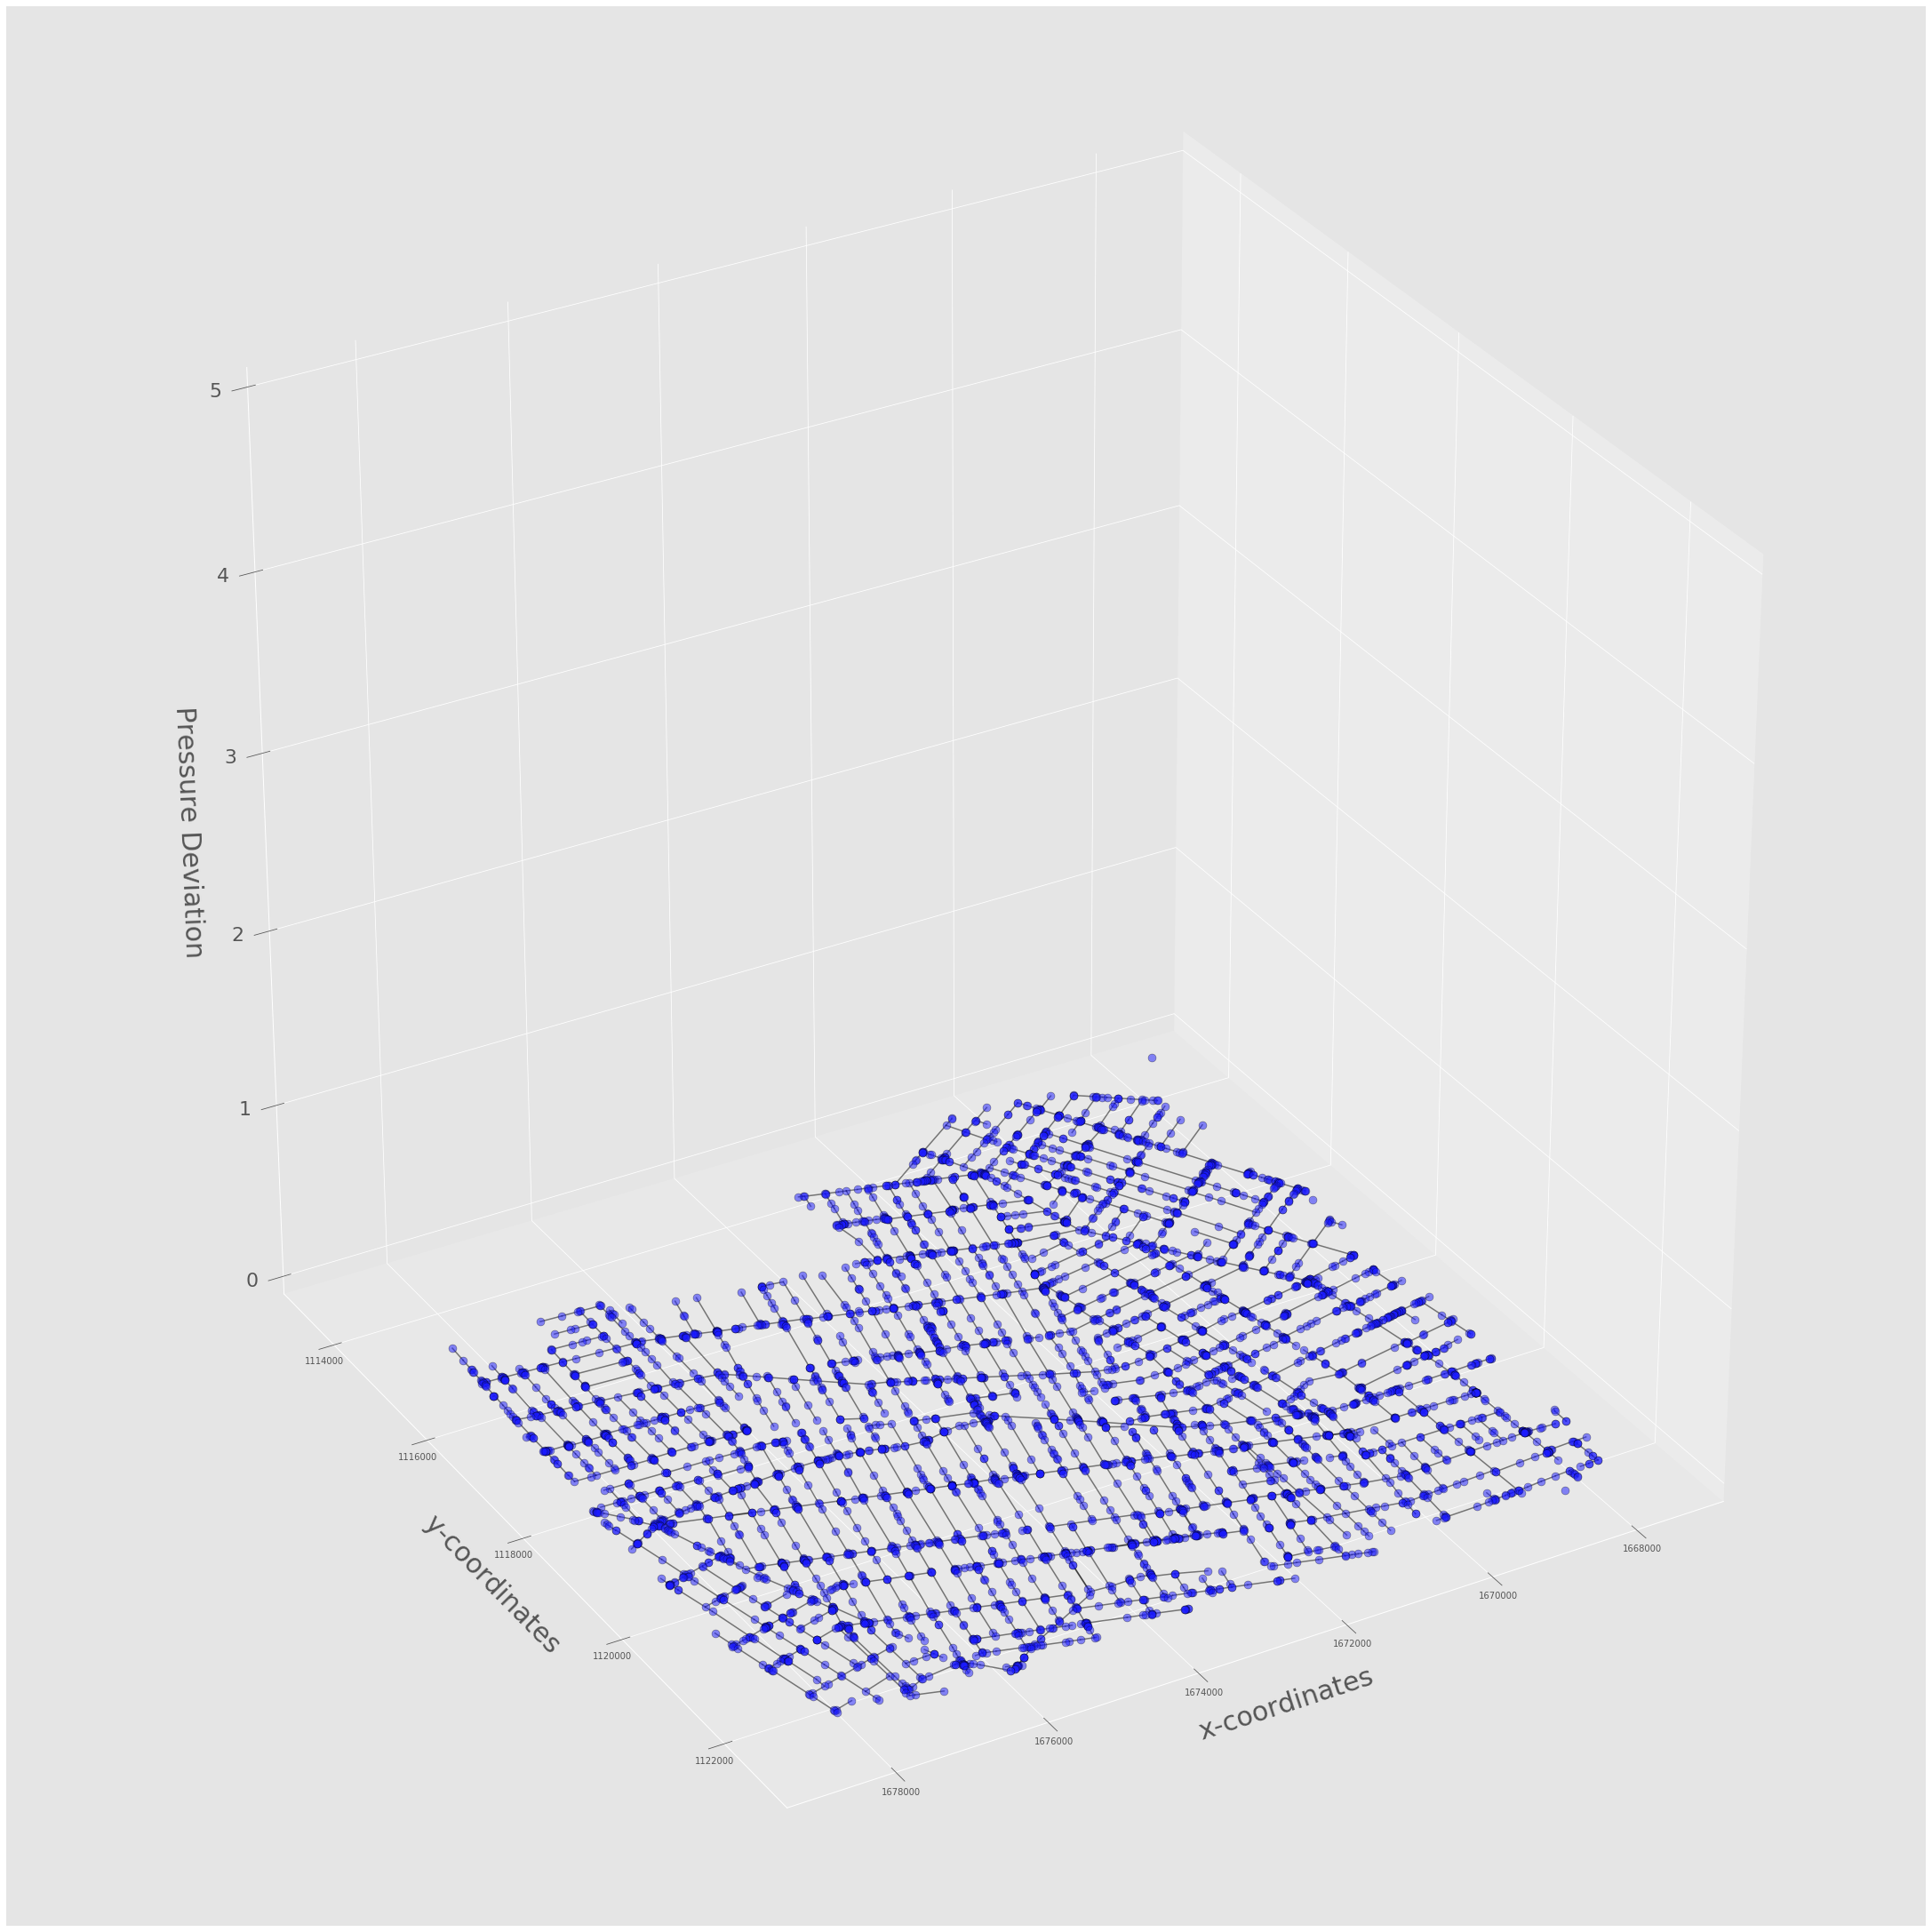

In [99]:
d2plotname = dirpltpath+"/"+"NYU Anamoly Data_48_Nodes_Leak1_3D_velo_deviation.png"
print(d2plotname)
draw_3d_color(color_indexed48_1,d2plotname)

In [79]:
def save_data_file(temp):
    if temp == 16:
        arr1=color_indexed1
        arr11=color_indexed11
        arr21=color_indexed21
        arr31=color_indexed31
        arr41=color_indexed41
    elif temp==0:
        arr1=color_indexed0_1
        arr11=color_indexed0_11
        arr21=color_indexed0_21
        arr31=color_indexed0_31
        arr41=color_indexed0_41
    elif temp==32:
        arr1=color_indexed32_1
        arr11=color_indexed32_11
        arr21=color_indexed32_21
        arr31=color_indexed32_31
        arr41=color_indexed32_41
    elif temp==48:
        arr1=color_indexed48_1
        arr11=color_indexed48_11
        arr21=color_indexed48_21
        arr31=color_indexed48_31
        arr41=color_indexed48_41
    elif temp==64:
        arr1=color_indexed64_1
        arr11=color_indexed64_11
        arr21=color_indexed64_21
        arr31=color_indexed64_31
        arr41=color_indexed64_41
    day = np.hstack([[0]*arr1.NAME.size,[1]*arr1.NAME.size,[2]*arr1.NAME.size,[3]*arr1.NAME.size,[4]*arr1.NAME.size])
    p = np.hstack([arr1.NodePressure,arr11.NodePressure,arr21.NodePressure,arr31.NodePressure,arr41.NodePressure])
    pd = np.hstack([arr1.PressureDeviation,arr11.PressureDeviation,arr21.PressureDeviation,arr31.PressureDeviation,arr41.PressureDeviation])
    names = np.hstack([res1.NAME,res11.NAME,res21.NAME,res31.NAME,res41.NAME])
    temps=np.hstack([[temp]*arr1.NAME.size,[temp]*arr1.NAME.size,[temp]*arr1.NAME.size,[temp]*arr1.NAME.size,[temp]*arr1.NAME.size])
    color=np.hstack([arr1.color,arr11.color,arr21.color,arr31.color,arr41.color])
    final_file = np.vstack([names.T,p.T,pd.T,temps.T,color.T,day.T])

    np.savetxt("data_pipes_vel"+str(temp)+".txt", final_file.T,fmt='%s')
    np.savetxt("data_pipes_vel_ind_"+str(temp)+".txt", final_file[2],fmt='%s')
    
    labels = np.hstack([[0]*arr1.NAME.size,[0]*arr1.NAME.size,[0]*arr1.NAME.size,[0]*arr1.NAME.size,[0]*arr1.NAME.size])
    labels[np.where(final_file[4]>=1)]=1
    targets=labels
    
    np.savetxt("target_nodes"+str(temp)+".txt", targets.T,fmt='%s')
    
    return final_file, targets


In [2]:
#0BEC50B8
labels = np.hstack([[0]*res1.NAME.size,[0]*res1.NAME.size,[0]*res1.NAME.size,[0]*res1.NAME.size,[0]*res1.NAME.size])
file_targets=np.vstack([names.T,labels.T,pd.T])
file_targets[1][np.where(file_targets[2]>=0.18)]=1
targets=file_targets[1]
np.savetxt("target.txt", targets.T,fmt='%s')

NameError: name 'np' is not defined

In [80]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn import svm

In [81]:
final_file_0,target_0 = save_data_file(0)
final_file_16,target_16 = save_data_file(16)
final_file_32,target_32= save_data_file(32)
final_file_48,target_48 = save_data_file(48)
final_file_64,target_64 = save_data_file(64)


In [50]:
consolidated_file = np.concatenate((final_file_0,final_file_16,final_file_32,final_file_48,final_file_64),axis=1)
consolidated_target = np.concatenate((target_0,target_16,target_32,target_48,target_64))


In [82]:

#ros = RandomOverSampler(sampling_strategy=0.3, random_state=42)



sess=tf.Session()
X=np.array([final_file_0[5],final_file_0[3],final_file_0[2]])
X=X.T

y=target_0

#X_res, y_res = ros.fit_resample(X, y)

#Iperm = np.random.permutation(ntr)

#X_train=X[0:leny_7]
#X_test=X[leny_7:ntr]
#y_train=y[0:leny_7]
#y_test=y[leny_7:ntr]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
#X_train=X_train.reshape(-1, 1)
#X_test=X_test.reshape(-1,1)
y_train=y_train.astype('int')
y_test=y_test.astype('int')
print(X_train.shape)

(19436, 3)


In [84]:
svc = svm.SVC(probability=False,  kernel="linear", C=2.8, gamma=.0073,verbose=10)
svc.fit(X_train,y_train)

[LibSVM]

SVC(C=2.8, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0073, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=10)

In [85]:
yhat_ts = svc.predict(X_test)

In [86]:
acc = np.mean(yhat_ts == y_test)
acc

0.9666598065445565

In [87]:
S = svc.support_vectors_

[[0.996 0.018]
 [0.037 0.828]]


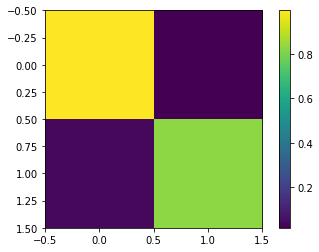

In [88]:
from sklearn.metrics import confusion_matrix
C = confusion_matrix(y_test,yhat_ts)

# Normalize the confusion matrix
Csum = np.sum(C,1)
C = C / Csum[None,:]

# Print the confusion matrix
print(np.array_str(C, precision=3, suppress_small=True))
plt.imshow(C, interpolation='none')
plt.colorbar()

In [89]:
np.unique(y_test,return_counts=True)

(array([0, 1]), array([4004,  855]))

In [90]:
np.unique(y_train,return_counts=True)

(array([0, 1]), array([15966,  3470]))

In [91]:
np.unique(yhat_ts,return_counts=True)

(array([0, 1]), array([4136,  723]))

In [92]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression(verbose=10, solver='lbfgs',\
                                         multi_class='multinomial',max_iter=1000)
logreg.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=10,
                   warm_start=False)

In [93]:
yhat = logreg.predict(X_test)
acc1 = np.mean(yhat == y_test)
acc1

0.9384647046717431

[[0.996 0.018]
 [0.037 0.828]]


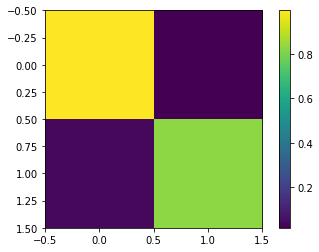

In [94]:
C1 = confusion_matrix(y_test,yhat_ts)


# Normalize the confusion matrix
Csum1 = np.sum(C1,1)
C1 = C1 / Csum[None,:]

# Print the confusion matrix
print(np.array_str(C1, precision=3, suppress_small=True))
plt.imshow(C1, interpolation='none')
plt.colorbar()

In [95]:
X_multi=np.array([final_file_0[3],final_file_0[2]])
X_multi=X_multi.T

y_multi = final_file_0[4]

np.savetxt("target_nodes_multi_0"+".txt", y_multi.T,fmt='%s')


Xm_train, Xm_test, ym_train, ym_test = train_test_split(X_multi, y_multi, test_size=0.20, random_state=42)
ym_train=ym_train.astype('int')
ym_test=ym_test.astype('int')



In [96]:
clf = svm.SVC(decision_function_shape='ovo',kernel='rbf')

In [97]:
clf.fit(Xm_train, ym_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [98]:
ymhat = clf.predict(Xm_test)
acc1 = np.mean(ymhat == ym_test)
acc1

0.9728339164437126

[[[0.98  0.02  0.    0.    0.   ]
  [0.116 0.876 0.008 0.    0.   ]
  [0.    0.    1.    0.    0.   ]
  [0.    0.    0.    0.978 0.022]
  [0.    0.    0.    0.    1.   ]]]


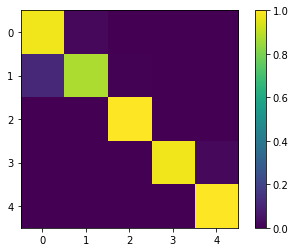

In [99]:
C2 = confusion_matrix(ym_test,ymhat)


# Normalize the confusion matrix
Csum1 = np.sum(C2,1)
C2 = C2[None, :]/Csum1[:,None]

# Print the confusion matrix
print(np.array_str(C2, precision=3, suppress_small=True))
plt.imshow(C2[0], interpolation='none')
plt.colorbar()


In [69]:
np.unique(ym_train)

array([0, 1, 2, 3, 4])